In [1]:
import sys
import os
import pandas as pd
source_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(source_path)

# preprocessed data

In [498]:
output_dir = source_path + "\\outputs\\preprocessed_data\\"
LOG_FILE = output_dir+"file_metadata_log.json"
#file_name = "icdar_train_df_patches_20250515_164130.csv"
#output_file = output_dir + file_name

In [499]:
df = file_IO.assemble_csv_from_log(LOG_FILE)

In [436]:
df.columns

Index(['experiment', 'full_path', 'size_bytes', 'created', 'modified',
       'accessed', 'seed', 'description', 'script_type', 'type', 'm patches',
       'source_file', 'gw', 'n_cc', 'model', 'pooling', 'custom transform',
       'save_h5', 'truncation', 'transform_mode', 'sort_by',
       'n_selected_lines', 'n_slices', 'spacing', 'r_mask', 'r_min', 'prop',
       'fraction of the max used to identify boundaries'],
      dtype='object')

In [487]:
df[['experiment','full_path','type']]

,experiment,full_path,type
0,icdar_train_df_20250514_165047.csv,D:\burtm\Visual_studio_code\PD_related_project...,NaN
1,icdar_train_df_20250514_175905.csv,c:\Users\andre\VsCode\PD related projects\gend...,original images
2,icdar_train_df_KAGGLE_20250514_181737.csv,c:\Users\andre\VsCode\PD related projects\gend...,feature extraction
3,icdar_train_df_patches_20250514_221029.csv,D:\burtm\Visual_studio_code\PD_related_project...,NaN
4,icdar_train_df_patches_20250515_164130.csv,c:\Users\andre\VsCode\PD related projects\gend...,standard patches
5,icdar_EXTRACTED_train_df_trocr-small-stage1_20...,D:\burtm\Visual_studio_code\PD_related_project...,NaN
6,icdar_EXTRACTED_train_df_trocr-small-handwritt...,D:\burtm\Visual_studio_code\PD_related_project...,NaN
7,icdar_EXTRACTED_train_df_resnet50_20250516_161...,D:\burtm\Visual_studio_code\PD_related_project...,NaN
8,icdar_EXTRACTED_train_df_resnet50_20250516_163...,D:\burtm\Visual_studio_code\PD_related_project...,NaN
9,icdar_EXTRACTED_train_df_vit-base-patch16-224-...,D:\burtm\Visual_studio_code\PD_related_project...,NaN


In [500]:
df['created'] = pd.to_datetime(df['created'])
df['experiment'] = df['experiment'].apply(lambda x: os.path.basename(str(x)))

In [501]:
#show the different types of preprocessed file
filtered = df[df['script_type'] == 'data_preprocessing']
grouped = filtered.sort_values('created', ascending=False).groupby('type')
for group_name, group_df in grouped:
    print(f"Type: {group_name}")
    print(group_df[['experiment', 'm patches']])
    print('-' * 40)


Type: body
                                 experiment  m patches
25  icdar_train_df_body_20250523_181312.csv        1.0
----------------------------------------
Type: feature extraction
                                  experiment  m patches
2  icdar_train_df_KAGGLE_20250514_181737.csv        NaN
----------------------------------------
Type: longer-than-higher
                                    experiment  m patches
20  icdar_train_df_patches_20250522_234152.csv        5.0
----------------------------------------
Type: original images
                           experiment  m patches
1  icdar_train_df_20250514_175905.csv        NaN
----------------------------------------
Type: small_patches
                                    experiment  m patches
18  icdar_train_df_patches_20250521_120324.csv        5.0
----------------------------------------
Type: standard patches
                                    experiment  m patches
21  icdar_train_df_patches_20250522_235724.csv       15.0
4

In [502]:
# get the files created on a given source file
source_file = 'icdar_train_df_body_20250523_181312.csv'
source_files=df[df['source_file'] == source_file]
source_files = source_files.sort_values(by='created', ascending=False)
for f in source_files[['created', 'description']].itertuples():
    print(f"{f.created} - {f.description}")


2025-05-23 23:04:00.271045 - 
        testing resnet50 on text-body dataset. I resize to 224,224
2025-05-23 22:51:40.526930 - 
        testing trocr-base-handwritten on text-body dataset
2025-05-23 22:44:22.255827 - 
        testing vit on text-body dataset


In [503]:
#models used on that source file
unique_models = source_files['model'].dropna().unique()
print(unique_models)

['resnet50' 'trocr-base-handwritten' 'vit-base-patch16-224-in21k']


In [504]:
source_files[source_files['model']=='trocr-base-handwritten']['experiment'].values

array(['icdar_EXTRACTED_train_df_trocr-base-handwritten_20250523_225140.csv'],
      dtype=object)

In [95]:
filtered_rows = df[df['source_file'] == 'icdar_train_df_20250514_175905.csv']

In [96]:
print(filtered_rows.head())

                                           experiment  \
3          icdar_train_df_patches_20250514_221029.csv   
4          icdar_train_df_patches_20250515_164130.csv   
18         icdar_train_df_patches_20250521_120324.csv   
19  icdar_train_df_words_sentences_20250522_230307...   
20         icdar_train_df_patches_20250522_234152.csv   

                                            full_path  size_bytes  \
3   D:\burtm\Visual_studio_code\PD_related_project...    147733.0   
4   D:\burtm\Visual_studio_code\PD_related_project...    862411.0   
18  D:\burtm\Visual_studio_code\PD_related_project...    975964.0   
19  D:\burtm\Visual_studio_code\PD_related_project...   1518303.0   
20  D:\burtm\Visual_studio_code\PD_related_project...    974807.0   

                      created                    modified  \
3  2025-05-14 22:10:30.078981  2025-05-14T22:10:30.203676   
4  2025-05-15 16:41:30.197320  2025-05-15T16:41:30.504546   
18 2025-05-21 12:03:25.094240  2025-05-21T12:03:25.356208  

In [35]:
file_IO.read_metadata(
    output_file,
    log_path=LOG_FILE
)

Metadata for icdar_train_df_patches_20250515_164130.csv:
full_path: D:\burtm\Visual_studio_code\PD_related_projects\outputs\preprocessed_data\icdar_train_df_patches_20250515_164130.csv
size_bytes: 862411
created: 2025-05-15T16:41:30.197320
modified: 2025-05-15T16:41:30.504546
accessed: 2025-05-15T16:41:38.731775
m patches: 5
source_file: icdar_train_df_20250514_175905.csv
gw: 5
n_cc: 10
description: For each unique index = (isEng,same_text) pair i select the m patches with more CCs
        the final df has m*4 patches per writer, it adds the x,y,x1,y1 columns to extract the patch
        It also add an index column that is unique for each patch


In [43]:
file_IO.show_model_instances(LOG_FILE,['model',"transform_mode","custom transform","description"], file_name)#([model_name=, custom_transform= .., ],source_file, sort=True)

Metadata for icdar_EXTRACTED_train_df_trocr-small-stage1_20250516_122528.csv:
model: trocr-small-stage1
description: I am performing inference with trocr-small-stage1 on the patches dataset and saving the output features as columns of the dataframe
        the columns are named f1, f2, .., f384
------------------------------------------
Metadata for icdar_EXTRACTED_train_df_trocr-small-handwritten_20250516_150814.csv:
model: trocr-small-handwritten
description: I am performing inference with trocr-small-handwritten on the patches dataset and saving the output features as columns of the dataframe
        the columns are named f1, f2, .., f384
------------------------------------------
Metadata for icdar_EXTRACTED_train_df_resnet50_20250516_161022.csv:
model: resnet50
custom transform: False
description: I am performing inference with resnet50 on the patches dataset and saving the output features as columns of the dataframe
        the columns are named f1, f2, .., f2048. I apply the sta

In [45]:
file_IO.get_file_name(LOG_FILE,{'model':'trocr-small-stage1'},file_name)

'icdar_EXTRACTED_train_df_trocr-small-stage1_20250516_122528.csv'

# feature extraction log

In [4]:
output_dir = source_path + "\\outputs\\logs\\"
LOG_FILE = output_dir+"feature_extraction_metadata_log.json"

In [ ]:
df = file_IO.assemble_csv_from_log(LOG_FILE)

In [18]:
import numpy as np
import scipy.stats as st

def summarize_cv_results(train_accs, oof_accs):
    train_accs = np.array(train_accs)
    oof_accs = np.array(oof_accs)

    def compute_summary(arr):
        mean = np.mean(arr)
        variance = np.var(arr, ddof=1)  # Unbiased variance (sample variance)
        min_val = np.min(arr)
        max_val = np.max(arr)
        median = np.median(arr)
        ci_low, ci_high = st.t.interval(0.95, len(arr)-1, loc=mean, scale=st.sem(arr))
        return mean, variance, min_val, max_val, median, (ci_low, ci_high)

    train_summary = compute_summary(train_accs)
    oof_summary = compute_summary(oof_accs)

    generalization_gap = train_summary[0] - oof_summary[0]  # Difference in mean accuracies

    if_name="IF_accuracy_"
    oof_name="OOF_accuracy_"
    summary = {
            f"{if_name}Mean": train_summary[0],
            f"{if_name}Variance": train_summary[1],
            f"{if_name}Min": train_summary[2],
            f"{if_name}Max": train_summary[3],
            f"{if_name}Median": train_summary[4],
            f"{if_name}Confidence Interval": train_summary[5],
            f"{oof_name}Mean": oof_summary[0],
            f"{oof_name}Variance": oof_summary[1],
            f"{oof_name}Min": oof_summary[2],
            f"{oof_name}Max": oof_summary[3],
            f"{oof_name}Median": oof_summary[4],
            f"{oof_name}Confidence Interval": oof_summary[5],
            "Generalization Gap": generalization_gap
        }

    return summary

In [35]:
def expand_accuracies(df):
    import pandas as pd
    new_columns = []
    for idx, row in df.iterrows():
        c_val = row['cross_val_accuracies']
        IF_values = c_val['IF']
        ensembled_accuracies_IF = []
        individual_accuracies_IF = []
        for value in IF_values:
            ensembled_accuracies_IF.append(value['ensembled'])
            individual_accuracies_IF.append(value['individual'])
        OOF_values = c_val['OOF']
        ensembled_accuracies_OOF = []
        individual_accuracies_OOF = []
        for value in OOF_values:
            ensembled_accuracies_OOF.append(value['ensembled'])
            individual_accuracies_OOF.append(value['individual'])
        ensembled_summary=summarize_cv_results(ensembled_accuracies_IF, ensembled_accuracies_OOF)
        individual_summary=summarize_cv_results(individual_accuracies_IF, individual_accuracies_OOF)
        subgroup_accuracies = row['subgroup_accuracies']
        subgroup_ensembled_summary = {}
        subgroup_individual_summary = {}
        for key in subgroup_accuracies:
            subgroup_ensembled_summary['(ensembled)'+key] = subgroup_accuracies[key]['ensembled']
            subgroup_individual_summary['(individual)'+key] = subgroup_accuracies[key]['individual']
        dict1 = {**ensembled_summary, **individual_summary,**subgroup_ensembled_summary, **subgroup_individual_summary}
        new_columns.append(dict1)
        acc_df = pd.DataFrame(new_columns)
    return pd.concat([df.reset_index(drop=True), acc_df.reset_index(drop=True)], axis=1)



In [36]:
df_exp=expand_accuracies(df)

In [22]:
df['subgroup_accuracies'][0]

C:\Users\andre\AppData\Local\Temp\ipykernel_34580\2477984629.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['subgroup_accuracies'][0]


{'english+arabic,different+same': {'ensembled': 0.8368794326241135,
  'individual': 0.7716312056737589},
 'english,different': {'ensembled': 0.8794326241134752,
  'individual': 0.7936170212765957},
 'english,same': {'ensembled': 0.8333333333333334,
  'individual': 0.7780141843971631},
 'arabic,different': {'ensembled': 0.8404255319148937,
  'individual': 0.7936170212765957},
 'arabic,same': {'ensembled': 0.8466312056737588,
  'individual': 0.7858156028368795},
 'english,different+same': {'ensembled': 0.8466312056737588,
  'individual': 0.7858156028368795},
 'arabic,different+same': {'ensembled': 0.8466312056737588,
  'individual': 0.7858156028368795},
 'english+arabic,different': {'ensembled': 0.8466312056737588,
  'individual': 0.7858156028368795},
 'english+arabic,same': {'ensembled': 0.8466312056737588,
  'individual': 0.7858156028368795}}

In [21]:
expand_accuracies(df)

Ensembled Summary:
{'IF_accuracy_Mean': np.float64(0.9530226155358898), 'IF_accuracy_Variance': np.float64(0.00024046381620610927), 'IF_accuracy_Min': np.float64(0.9292035398230089), 'IF_accuracy_Max': np.float64(0.9688888888888889), 'IF_accuracy_Median': np.float64(0.9601769911504425), 'IF_accuracy_Confidence Interval': (np.float64(0.9337682613430117), np.float64(0.972276969728768)), 'OOF_accuracy_Mean': np.float64(0.6414160401002507), 'OOF_accuracy_Variance': np.float64(0.0077815151914874875), 'OOF_accuracy_Min': np.float64(0.5535714285714286), 'OOF_accuracy_Max': np.float64(0.7719298245614035), 'OOF_accuracy_Median': np.float64(0.631578947368421), 'OOF_accuracy_Confidence Interval': (np.float64(0.5318852617578234), np.float64(0.750946818442678)), 'Generalization Gap': np.float64(0.3116065754356392)}


# exploration of feature_extraction_metadata_log.json

## initialization

In [41]:
from IPython.display import display


In [42]:
output_dir = source_path + "\\outputs\\logs\\"
LOG_FILE = output_dir+"feature_extraction_metadata_log.json"
df = file_IO.assemble_csv_from_log(LOG_FILE)

In [43]:
output_dir_2 = source_path + "\\outputs\\preprocessed_data\\"
LOG_FILE_2 = output_dir_2+"file_metadata_log.json"
df_2 = file_IO.assemble_csv_from_log(LOG_FILE_2)
df_2['created'] = pd.to_datetime(df_2['created'])
df_2['experiment'] = df_2['experiment'].apply(lambda x: os.path.basename(str(x)))
all_columns_2=df_2.columns

In [44]:
# Map 'm patches' and 'type' from df_2 to df_exp based on 'original raw file' and 'experiment'
df['m patches'] = df['original raw file'].map(df_2.set_index('experiment')['m patches'])
df['type of preprocessing'] = df['original raw file'].map(df_2.set_index('experiment')['type'])
df['type of preprocessing'] = df.apply(
    lambda row: f"{row['type of preprocessing']} ({int(row['m patches'])})" if pd.notnull(row['m patches']) else row['type of preprocessing'],
    axis=1
)

In [45]:
# Step 1: Extract timestamp part (last 15 characters)
df['timestamp_str'] = df['experiment'].str.extract(r'(\d{8}_\d{6})$')

# Step 2: Convert to datetime
df['time'] = pd.to_datetime(df['timestamp_str'], format='%Y%m%d_%H%M%S')

# Step 3: Sort by time
df = df.sort_values('time')

from datetime import datetime
# Step 4: Filter by date
cutoff_date = datetime(2025, 6, 5)
df = df[df['time'] > cutoff_date]

In [46]:
L=len(df)
metric_type='ensembled'
group_type=None#'english,all'
df_exp=file_IO.expand_accuracies(df,type=metric_type,group=group_type)
if group_type is None:
    accuracy_metric= metric_type
else:
    accuracy_metric = group_type+'_'+metric_type
all_columns=df_exp.columns

c:\Users\andre\anaconda3\envs\GeneralPurposeML\lib\site-packages\scipy\stats\_distn_infrastructure.py:2304: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Users\andre\anaconda3\envs\GeneralPurposeML\lib\site-packages\scipy\stats\_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [47]:
acc_cols=[f'{accuracy_metric}_IF_accuracy_Mean', f'{accuracy_metric}_OOF_accuracy_Mean', f'{accuracy_metric}_Generalization Gap']
exp_properties = ['type of preprocessing','FE model','classifier model','with PCA','model_params']
n_show=10

## tests

In [48]:
list(all_columns)

['experiment',
 'type of preprocessing',
 'original raw file',
 'input file',
 'FE model',
 'FE transform',
 'classifier model',
 'model_params',
 'n_splits',
 'train_on_language',
 'train_on_same',
 'task',
 'with cross validation',
 'with PCA',
 'training time for cross-validation',
 'training time for final model',
 'cross_val_accuracies',
 'subgroup_accuracies',
 'is_kaggle',
 'description',
 'test',
 'n_components',
 'cross_val_subgroup_accuracies',
 'm patches',
 'timestamp_str',
 'time',
 'ensembled_IF_accuracy_Mean',
 'ensembled_IF_accuracy_Variance',
 'ensembled_IF_accuracy_Min',
 'ensembled_IF_accuracy_Max',
 'ensembled_IF_accuracy_Median',
 'ensembled_IF_accuracy_Confidence Interval',
 'ensembled_OOF_accuracy_Mean',
 'ensembled_OOF_accuracy_Variance',
 'ensembled_OOF_accuracy_Min',
 'ensembled_OOF_accuracy_Max',
 'ensembled_OOF_accuracy_Median',
 'ensembled_OOF_accuracy_Confidence Interval',
 'ensembled_Generalization Gap']

In [49]:
list(all_columns_2)

['experiment',
 'full_path',
 'size_bytes',
 'created',
 'modified',
 'accessed',
 'seed',
 'description',
 'script_type',
 'type',
 'm patches',
 'source_file',
 'gw',
 'n_cc',
 'model',
 'pooling',
 'custom transform',
 'save_h5',
 'truncation',
 'transform_mode',
 'sort_by',
 'n_selected_lines',
 'n_slices',
 'spacing',
 'r_mask',
 'r_min',
 'prop',
 'fraction of the max used to identify boundaries']

In [50]:
df_2

,experiment,full_path,size_bytes,created,modified,accessed,seed,description,script_type,type,...,truncation,transform_mode,sort_by,n_selected_lines,n_slices,spacing,r_mask,r_min,prop,fraction of the max used to identify boundaries
0,icdar_train_df_20250514_165047.csv,D:\burtm\Visual_studio_code\PD_related_project...,147733,2025-05-14 16:50:47.697068,2025-05-14T16:50:47.756757,2025-05-14T16:50:47.756757,42.0,"dataframe with the following columns: writer, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,icdar_train_df_20250514_175905.csv,c:\Users\andre\VsCode\PD related projects\gend...,147733,2025-05-23 14:48:26.377873,2025-05-14T17:59:05.604248,2025-05-23T18:03:21.312672,42.0,"dataframe with the following columns: writer, ...",data_preprocessing,original images,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,icdar_train_df_KAGGLE_20250514_181737.csv,c:\Users\andre\VsCode\PD related projects\gend...,53948612,2025-05-23 14:48:26.898500,2025-05-14T18:17:45.372099,2025-05-23T14:48:35.793833,42.0,"dataframe with the following columns: writer, ...",data_preprocessing,feature extraction,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,icdar_train_df_patches_20250514_221029.csv,D:\burtm\Visual_studio_code\PD_related_project...,147733,2025-05-14 22:10:30.078981,2025-05-14T22:10:30.203676,2025-05-14T22:10:30.203676,NaN,"For each unique index = (isEng,same_text) pair...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,icdar_train_df_patches_20250515_164130.csv,c:\Users\andre\VsCode\PD related projects\gend...,862411,2025-05-23 14:48:35.939312,2025-05-15T16:41:30.504546,2025-05-24T00:04:42.352683,NaN,"For each unique index = (isEng,same_text) pair...",data_preprocessing,standard patches,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,icdar_EXTRACTED_train_df_trocr-small-stage1_20...,D:\burtm\Visual_studio_code\PD_related_project...,43379066,2025-05-16 12:25:28.589676,2025-05-16T12:25:33.533804,2025-05-16T12:25:33.533804,NaN,I am performing inference with trocr-small-sta...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,icdar_EXTRACTED_train_df_trocr-small-handwritt...,D:\burtm\Visual_studio_code\PD_related_project...,43373595,2025-05-16 15:08:14.680020,2025-05-16T15:08:18.854499,2025-05-16T15:08:18.854499,NaN,I am performing inference with trocr-small-han...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,icdar_EXTRACTED_train_df_resnet50_20250516_161...,D:\burtm\Visual_studio_code\PD_related_project...,216707350,2025-05-16 16:10:22.775409,2025-05-16T16:10:53.312326,2025-05-16T16:10:53.312326,NaN,I am performing inference with resnet50 on the...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,icdar_EXTRACTED_train_df_resnet50_20250516_163...,D:\burtm\Visual_studio_code\PD_related_project...,220215329,2025-05-16 16:37:38.026354,2025-05-16T16:38:11.704283,2025-05-16T16:38:11.704283,NaN,I am performing inference with resnet50 on the...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,icdar_EXTRACTED_train_df_vit-base-patch16-224-...,D:\burtm\Visual_studio_code\PD_related_project...,89875090,2025-05-17 15:16:44.318702,2025-05-17T15:16:58.167914,2025-05-17T15:16:58.167914,NaN,I am performing inference with the vit model o...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df_exp

,experiment,type of preprocessing,original raw file,input file,FE model,FE transform,classifier model,model_params,n_splits,train_on_language,...,ensembled_IF_accuracy_Max,ensembled_IF_accuracy_Median,ensembled_IF_accuracy_Confidence Interval,ensembled_OOF_accuracy_Mean,ensembled_OOF_accuracy_Variance,ensembled_OOF_accuracy_Min,ensembled_OOF_accuracy_Max,ensembled_OOF_accuracy_Median,ensembled_OOF_accuracy_Confidence Interval,ensembled_Generalization Gap
0,1_20250605_161144,standard patches (5),icdar_train_df_patches_20250515_164130.csv,icdar_EXTRACTED_train_df_trocr-small-stage1_20...,trocr-small-stage1,NaN,logreg,"{'C': 1.0, 'class_weight': None, 'dual': False...",5,all,...,0.725664,0.714602,"(0.6937698063415492, 0.7313334384962089)",0.618703,0.002116,0.558036,0.674107,0.609649,"(0.5615886889677765, 0.6758173260698174)",0.093849
1,1_20250605_161235,standard patches (5),icdar_train_df_patches_20250515_164130.csv,icdar_EXTRACTED_train_df_trocr-small-stage1_20...,trocr-small-stage1,NaN,logreg,"{'C': 1.0, 'class_weight': None, 'dual': False...",5,all,...,0.725664,0.714602,"(0.6937698063415492, 0.7313334384962089)",0.618703,0.002116,0.558036,0.674107,0.609649,"(0.5615886889677765, 0.6758173260698174)",0.093849
2,2_20250605_161244,standard patches (5),icdar_train_df_patches_20250515_164130.csv,icdar_EXTRACTED_train_df_trocr-small-stage1_20...,trocr-small-stage1,NaN,logreg,"{'C': 1.0, 'class_weight': None, 'dual': False...",5,all,...,0.797566,0.782222,"(0.761281933016546, 0.7998488437779475)",0.624734,0.002880,0.553571,0.688596,0.635965,"(0.5581033594031861, 0.6913640591431798)",0.155832
3,3_20250605_161255,standard patches (5),icdar_train_df_patches_20250515_164130.csv,icdar_EXTRACTED_train_df_trocr-small-stage1_20...,trocr-small-stage1,NaN,mlp,"{'activation': 'relu', 'alpha': 0.0001, 'batch...",5,all,...,0.991111,0.933333,"(0.8345594984079596, 0.9976076599007919)",0.623951,0.002492,0.553571,0.674107,0.627193,"(0.561971565028871, 0.6859294374773945)",0.292133
4,4_20250605_161306,standard patches (5),icdar_train_df_patches_20250515_164130.csv,icdar_EXTRACTED_train_df_trocr-small-stage1_20...,trocr-small-stage1,NaN,mlp,"{'activation': 'relu', 'alpha': 0.0001, 'batch...",5,all,...,0.933628,0.853982,"(0.8099868956626026, 0.9173228388506718)",0.628352,0.002223,0.566964,0.674107,0.653509,"(0.5698033748206932, 0.6869008858309358)",0.235303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,136_20250605_164935,words-sentences (9),icdar_train_df_words_sentences_20250522_230307...,icdar_EXTRACTED_train_df_trocr-large-stage1_20...,trocr-large-stage1,NaN,mlp,"{'activation': 'relu', 'alpha': 0.0001, 'batch...",5,all,...,1.000000,0.987832,"(0.9481641934963376, 1.0128977534063173)",0.726801,0.002959,0.642857,0.785088,0.736607,"(0.6592557715712452, 0.7943469853209854)",0.253730
137,137_20250605_164943,body (1),icdar_train_df_body_20250523_181312.csv,icdar_EXTRACTED_train_df_clip-vit-large-patch1...,clip-vit-large-patch14,NaN,logreg,"{'C': 1.0, 'class_weight': None, 'dual': False...",5,all,...,0.825221,0.807778,"(0.7975664685253024, 0.8229900703144223)",0.639865,0.001111,0.589286,0.675439,0.642857,"(0.5984816480535375, 0.6812489283875651)",0.170413
138,138_20250605_164950,body (1),icdar_train_df_body_20250523_181312.csv,icdar_EXTRACTED_train_df_clip-vit-large-patch1...,clip-vit-large-patch14,NaN,logreg,"{'C': 1.0, 'class_weight': None, 'dual': False...",5,all,...,0.991150,0.991111,"(0.9850546256222685, 0.9927900154790099)",0.622259,0.002128,0.575893,0.687500,0.627193,"(0.564975006341471, 0.6795425375181782)",0.366664
139,139_20250605_164959,body (1),icdar_train_df_body_20250523_181312.csv,icdar_EXTRACTED_train_df_clip-vit-large-patch1...,clip-vit-large-patch14,NaN,mlp,"{'activation': 'relu', 'alpha': 0.0001, 'batch...",5,all,...,0.901549,0.862832,"(0.696256586868906, 0.9354779264054301)",0.617105,0.001203,0.598214,0.678571,0.600877,"(0.5740445246984694, 0.66016600161732)",0.198762


## run for experiments

### functions

In [65]:
#extraction
def get_models_on_source(df,source_file):
    # get the files created on a given source file
    source_files = df[df['source_file'] == source_file]
    source_files = source_files.sort_values(by='created', ascending=False)
    '''for f in source_files[['created', 'description']].itertuples():
        print(f"{f.created} - {f.description}")'''
        #models used on that source file
    unique_models = source_files['model'].dropna().unique()
    return unique_models, source_files
def get_experiments_on_model(model_name, source_files):
    # get the experiments on a given model
    return source_files[source_files['model'] == model_name]['experiment'].values

In [ ]:
#experiments
#display
def print_model_properties_txt(idx,df,cols=None):
    '''Prints the properties of a model at a specific line in a formatted way'''
    if cols is None:
        cols = df.columns.tolist()
    print(f"Model: {df['experiment'][idx]}")
    for col in cols:
        if col in df.columns:
            print(f"{col}: {df[col][idx]}")
    print('-' * 40)
def display_specific(df, n=10, cols=None, save_to_file=True):
    '''Displays the first n rows of the dataframe with specified columns'''
    if cols is None:
        cols = df.columns.tolist()
    return display(df[cols].head(n))
def display_group(groups, n=10, cols=None):
    '''Displays the first n rows of each group when a group view is provided as input'''
    if cols is None:
        cols = df.columns.tolist()
    for group_name, group_df in groups:
        print(f"Group: {group_name}")
        display(group_df[cols].head(n))
        print('-' * 40)

#save
def save_specific(df, n=10, cols=None):
    '''save the first n rows of the dataframe with specified columns'''
    if cols is None:
        cols = df.columns.tolist()
    df[cols].head(n).to_csv('specific_models.csv', index=False, float_format='%.3f')
    return

def max_accuracy(df, filters=None,aggregation='ensembled'):
    ''' exclude some rows from the search by providing filters as a dictionary
    then returns the df sorted according to the max accuracy of the specified aggregation type
    aggregation can be: 'ensembled' or 'individual' '''
    filtered_df = df.copy()
    if filters:
        mask = pd.Series(True, index=df.index)
        for col, val in filters.items():
            mask &= df[col] == val
        filtered_df = df[mask]
    out_df=filtered_df.sort_values(by=f'{aggregation}_OOF_accuracy_Mean', ascending=False)
    return out_df
def max_min_anything(df, filters=None,feature=None,ascending=False):
    '''more general function than max_accuracy, can be used also on other features apart accuracy '''
    filtered_df = df.copy()
    if filters:
        mask = pd.Series(True, index=df.index)
        for col, val in filters.items():
            mask &= df[col] == val
        filtered_df = df[mask]
    out_df=filtered_df.sort_values(by=feature, ascending=ascending)
    return out_df
def get_unique(df,col):
    '''returns a list of unique model names from the dataframe'''
    return df[col].unique().tolist()
def get_occurrences(df,col):
    '''you define a property and it returns a dataframe with the count of occurrences of each unique value in that property'''
    names=get_unique(df,col)
    filtered_df = df[df[col].isin(names)]
    model_counts = filtered_df[col].value_counts()
    return pd.DataFrame({col: model_counts.index, 'count': model_counts.values})
def fe_applied_on_source(df, source_file):
    '''returns a dataframe that lists all the feature extraction experiments performed on a given source file'''
    applied=df[df['original raw file'] == source_file]
    return applied['FE model'].unique().tolist()
def get_type_of_exp_per_model(df):
    '''returns a dataframe that lists for each model the type of preprocessing applied'''
    #filtered_df = df[df['script_type'] == 'feature_extraction']
    filtered_df = df.copy()
    model_types = filtered_df.groupby('FE model')['type of preprocessing'].unique().reset_index()
    model_types['type of preprocessing'] = model_types['type of preprocessing'].apply(lambda x: ', '.join(x))
    return model_types.rename(columns={'FE model': 'Model', 'type of preprocessing': 'Type of Preprocessing'})
def get_model_per_type(df):
    '''returns a dataframe that lists for each model the experiments performed on it'''
    filtered_df = df.copy()
    model_experiments = filtered_df.groupby('type of preprocessing')['FE model'].unique().reset_index()
    model_experiments['FE model'] = model_experiments['FE model'].apply(lambda x: ', '.join(x))
    return model_experiments.rename(columns={'types of preprocessing': 'types of preprocessing', 'FE model': 'FE Models'})
def fixed_model_varying_inputs(df, model_name,filters=None,grouping_cols=None,feature=None,ascending=False,metric='mean'):
    '''this function lets you select a model type. The it filters out rows based on a dictionary and returns groups of the filtered df 
    grouped by the grouping_cols.'''
    filtered_df = df[df['FE model'] == model_name]
    filtered_df = max_min_anything(filtered_df, filters=filters,feature=feature,ascending=ascending)
    filtered_df = filtered_df.groupby(grouping_cols)
    return filtered_df
def aggregate_statistics(groups,features,metrics):
    ''' given groups of data it computes the required metrics for the group and returns the aggregated dataframe'''
    return groups[features].agg(metrics).reset_index()#.rename(columns={feature: f'{metric}_{feature}'})

### get model on source

In [67]:
source_file= 'icdar_train_df_body_20250523_181312.csv'
unique_models, source_files = get_models_on_source(df_2,source_file)
for model_name in unique_models:
    print(f"Model: {model_name}")
    experiments = get_experiments_on_model(model_name, source_files)
    print(f"Experiments: {experiments}")
    print('-' * 40)

Model: clip-vit-large-patch14
Experiments: ['icdar_EXTRACTED_train_df_clip-vit-large-patch14_20250605_133231.csv']
----------------------------------------
Model: resnet50
Experiments: ['icdar_EXTRACTED_train_df_resnet50_20250523_230400.csv']
----------------------------------------
Model: trocr-base-handwritten
Experiments: ['icdar_EXTRACTED_train_df_trocr-base-handwritten_20250523_225140.csv']
----------------------------------------
Model: vit-base-patch16-224-in21k
Experiments: ['icdar_EXTRACTED_train_df_vit-base-patch16-224-in21k_20250523_224422.csv']
----------------------------------------


### experiment info

This identifies the types of datasets i have as preprocessed datasets. It shows their name and the number of patches each have.
The second table shows the corresponding types in the df_exp df

In [68]:
unique_combinations = df_2[['m patches', 'type']].drop_duplicates()
display(unique_combinations)

,m patches,type
0,NaN,NaN
1,NaN,original images
2,NaN,feature extraction
3,5.0,NaN
4,5.0,standard patches
18,5.0,small_patches
19,9.0,words-sentences
20,5.0,longer-than-higher
21,15.0,standard patches
25,1.0,body


In [69]:
#unique_combinations = df_2[not('EXTRACTED' in df_2['experiment'])][['m patches', 'experiment']].drop_duplicates()
#display(unique_combinations)

In [70]:
unique_combinations = df_exp[['original raw file', 'type of preprocessing','m patches']].drop_duplicates()
#unique_combinations = df_exp[['original raw file', 'type of preprocessing']].drop_duplicates()

display(unique_combinations)

,original raw file,type of preprocessing,m patches
0,icdar_train_df_patches_20250515_164130.csv,standard patches (5),5.0
49,icdar_train_df_patches_20250521_120324.csv,small_patches (5),5.0
61,icdar_train_df_words_sentences_20250522_230307...,words-sentences (9),9.0
77,icdar_train_df_patches_20250522_235724.csv,standard patches (15),15.0
89,icdar_train_df_body_20250523_181312.csv,body (1),1.0
101,icdar_train_df_patches_20250522_234152.csv,longer-than-higher (5),5.0


The following table shows more detailed information about each preprocessed datast file

In [71]:
#show the different types of preprocessed file
filtered = df_2[df_2['script_type'] == 'data_preprocessing']
grouped = filtered.sort_values('created', ascending=False).groupby('type')
for group_name, group_df in grouped:
    print(f"Type: {group_name}")
    for idx, row in group_df.iterrows():
        print_model_properties_txt(idx, group_df, cols=['experiment', 'm patches','gw', 'description'])
    #print(group_df[['experiment', 'm patches','description']])
    print('-' * 40)

Type: body
Model: icdar_train_df_body_20250523_181312.csv
experiment: icdar_train_df_body_20250523_181312.csv
m patches: 1.0
gw: nan
description: 
        I crop each image so that there is no white around the text -> i am zooming on the text
----------------------------------------
----------------------------------------
Type: feature extraction
Model: icdar_train_df_KAGGLE_20250514_181737.csv
experiment: icdar_train_df_KAGGLE_20250514_181737.csv
m patches: nan
gw: nan
description: dataframe with the following columns: writer, language, same_text, isEng, train, index and kaggle features; 
        This can be used to train FE models
----------------------------------------
----------------------------------------
Type: longer-than-higher
Model: icdar_train_df_patches_20250522_234152.csv
experiment: icdar_train_df_patches_20250522_234152.csv
m patches: 5.0
gw: 3.0
description: 
        I am creating patches that are longer than they are wide.
        prop gives the ratio of the width t

The following table shows the number of times each model was used in experiments. This also saves a frequency vector that can be used in averages

In [72]:
weights = get_occurrences(df_exp,'FE model')
display(weights)

,FE model,count
0,trocr-base-handwritten,24
1,vit-base-patch16-224-in21k,20
2,resnet50,20
3,crnn_vgg16_bn,20
4,clip-vit-large-patch14,16
5,trocr-small-stage1,13
6,trocr-large-handwritten,8
7,vitstr_base,8
8,trocr-small-handwritten,4
9,dresnet50,4


The following table shows to which preprocessed dataseets each model was applied
The next one shows for each dataset what models were applied to it

In [73]:
to_show=get_type_of_exp_per_model(df_exp)
for idx, row in to_show.iterrows():
    print(f"Model: {row['Model']}")
    print(f"Type of Preprocessing: {row['Type of Preprocessing']}")
    print('-' * 40)

Model: clip-vit-large-patch14
Type of Preprocessing: standard patches (5), words-sentences (9), standard patches (15), body (1)
----------------------------------------
Model: crnn_vgg16_bn
Type of Preprocessing: standard patches (5), words-sentences (9), longer-than-higher (5)
----------------------------------------
Model: dresnet50
Type of Preprocessing: standard patches (5)
----------------------------------------
Model: resnet50
Type of Preprocessing: standard patches (5), small_patches (5), standard patches (15), body (1)
----------------------------------------
Model: trocr-base-handwritten
Type of Preprocessing: standard patches (5), small_patches (5), words-sentences (9), standard patches (15), body (1), longer-than-higher (5)
----------------------------------------
Model: trocr-large-handwritten
Type of Preprocessing: standard patches (5), words-sentences (9)
----------------------------------------
Model: trocr-large-stage1
Type of Preprocessing: words-sentences (9)
-------

In [74]:
to_show=get_model_per_type(df_exp)
for idx, row in to_show.iterrows():
    #print(row)
    print(f"Type: {row['type of preprocessing']}")
    print(f"FE Models: {row['FE Models']}")
    print('-' * 40)

Type: body (1)
FE Models: vit-base-patch16-224-in21k, trocr-base-handwritten, resnet50, clip-vit-large-patch14
----------------------------------------
Type: longer-than-higher (5)
FE Models: trocr-small-stage1, trocr-base-handwritten, crnn_vgg16_bn
----------------------------------------
Type: small_patches (5)
FE Models: vit-base-patch16-224-in21k, trocr-base-handwritten, resnet50
----------------------------------------
Type: standard patches (15)
FE Models: vit-base-patch16-224-in21k, trocr-base-handwritten, resnet50, clip-vit-large-patch14
----------------------------------------
Type: standard patches (5)
FE Models: trocr-small-stage1, trocr-small-handwritten, resnet50, vit-base-patch16-224-in21k, trocr-base-handwritten, clip-vit-large-patch14, trocr-large-handwritten, dresnet50, crnn_vgg16_bn, vitstr_base
----------------------------------------
Type: words-sentences (9)
FE Models: trocr-small-stage1, trocr-base-handwritten, vit-base-patch16-224-in21k, crnn_vgg16_bn, vitstr_bas

### First ten models by accuracy , distribution of accuracies

In [75]:
#overall
display_specific(max_accuracy(df_exp, filters=None, aggregation=accuracy_metric), n=n_show, cols=acc_cols+exp_properties)

,ensembled_IF_accuracy_Mean,ensembled_OOF_accuracy_Mean,ensembled_Generalization Gap,type of preprocessing,FE model,classifier model,with PCA,model_params
134,0.909561,0.752381,0.157181,words-sentences (9),trocr-large-stage1,logreg,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
126,0.847949,0.749765,0.098184,standard patches (15),clip-vit-large-patch14,logreg,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
128,0.968079,0.735589,0.232490,standard patches (15),clip-vit-large-patch14,mlp,False,"{'activation': 'relu', 'alpha': 0.0001, 'batch..."
26,0.880968,0.734680,0.146287,standard patches (5),clip-vit-large-patch14,logreg,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
28,0.943551,0.731125,0.212426,standard patches (5),clip-vit-large-patch14,mlp,False,"{'activation': 'relu', 'alpha': 0.0001, 'batch..."
125,0.799407,0.729323,0.070084,standard patches (15),clip-vit-large-patch14,logreg,True,"{'C': 1.0, 'class_weight': None, 'dual': False..."
127,0.967468,0.727600,0.239868,standard patches (15),clip-vit-large-patch14,mlp,True,"{'activation': 'relu', 'alpha': 0.0001, 'batch..."
136,0.980531,0.726801,0.253730,words-sentences (9),trocr-large-stage1,mlp,False,"{'activation': 'relu', 'alpha': 0.0001, 'batch..."
25,0.814928,0.724217,0.090711,standard patches (5),clip-vit-large-patch14,logreg,True,"{'C': 1.0, 'class_weight': None, 'dual': False..."
66,0.880736,0.723152,0.157585,words-sentences (9),trocr-base-handwritten,logreg,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."


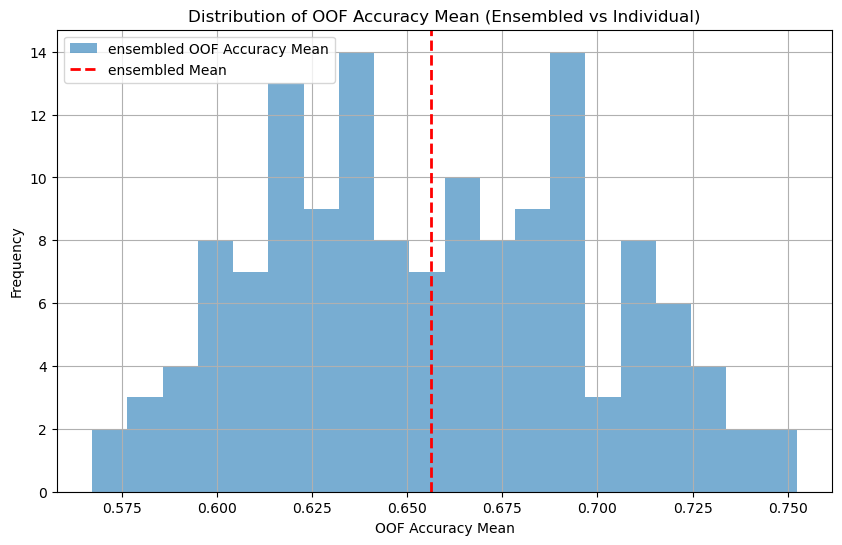

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_exp[f'{accuracy_metric}_OOF_accuracy_Mean'], bins=20, alpha=0.6, label=f'{accuracy_metric} OOF Accuracy Mean')

# Add vertical lines at the mean positions
plt.axvline(df_exp[f'{accuracy_metric}_OOF_accuracy_Mean'].mean(), color='red', linestyle='dashed', linewidth=2, label=f'{accuracy_metric} Mean')

plt.xlabel('OOF Accuracy Mean')
plt.ylabel('Frequency')
plt.title('Distribution of OOF Accuracy Mean (Ensembled vs Individual)')
plt.legend()
plt.grid(True)
plt.show()

### For each model I show the best model and sort by accuracy

In [77]:
# model specific
to_show=['FE model',f'{accuracy_metric}_OOF_accuracy_Mean']+acc_cols+exp_properties
to_show = list(dict.fromkeys(to_show))
display_specific(max_accuracy(df_exp, filters=None, aggregation=accuracy_metric).groupby(['FE model'], as_index=False).first().sort_values
                 (by=f'{accuracy_metric}_OOF_accuracy_Mean', ascending=False), 
              n=n_show, cols=to_show)

,FE model,ensembled_OOF_accuracy_Mean,ensembled_IF_accuracy_Mean,ensembled_Generalization Gap,type of preprocessing,classifier model,with PCA,model_params
6,trocr-large-stage1,0.752381,0.909561,0.157181,words-sentences (9),logreg,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
0,clip-vit-large-patch14,0.749765,0.847949,0.098184,standard patches (15),logreg,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
4,trocr-base-handwritten,0.723152,0.880736,0.157585,words-sentences (9),logreg,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
9,vit-base-patch16-224-in21k,0.721570,0.871217,0.149648,standard patches (15),logreg,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
5,trocr-large-handwritten,0.711685,0.919318,0.207632,standard patches (5),logreg,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
3,resnet50,0.709085,0.929959,0.220873,standard patches (15),logreg,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
2,dresnet50,0.698387,0.983598,0.285211,standard patches (5),logreg,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
1,crnn_vgg16_bn,0.667137,0.779676,0.112540,words-sentences (9),logreg,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
8,trocr-small-stage1,0.656501,0.781443,0.124943,words-sentences (9),logreg,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
10,vitstr_base,0.642419,0.798515,0.156097,words-sentences (9),logreg,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."


### for each type of preprocessed dataset i show the best result achieved

In [78]:
#per preprocessed type
to_show=['type of preprocessing',f'{accuracy_metric}_OOF_accuracy_Mean']+acc_cols+exp_properties
to_show = list(dict.fromkeys(to_show))
display_specific(max_accuracy(df_exp, filters=None, aggregation=accuracy_metric).groupby('type of preprocessing', as_index=False).first().sort_values(by=f'{accuracy_metric}_OOF_accuracy_Mean', ascending=False), 
              n=n_show, cols=to_show)

,type of preprocessing,ensembled_OOF_accuracy_Mean,ensembled_IF_accuracy_Mean,ensembled_Generalization Gap,FE model,classifier model,with PCA,model_params
5,words-sentences (9),0.752381,0.909561,0.157181,trocr-large-stage1,logreg,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
3,standard patches (15),0.749765,0.847949,0.098184,clip-vit-large-patch14,logreg,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
4,standard patches (5),0.734680,0.880968,0.146287,clip-vit-large-patch14,logreg,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
1,longer-than-higher (5),0.691275,0.893381,0.202105,trocr-base-handwritten,logreg,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
2,small_patches (5),0.680749,0.772609,0.091860,trocr-base-handwritten,logreg,True,"{'C': 1.0, 'class_weight': None, 'dual': False..."
0,body (1),0.654182,0.895376,0.241193,vit-base-patch16-224-in21k,mlp,False,"{'activation': 'relu', 'alpha': 0.0001, 'batch..."


### fo each model type i show the best model with pca and without pca. 

In [79]:
# model specific (ensembled)
filters={'with PCA': True}
cols=['FE model',f'{accuracy_metric}_OOF_accuracy_Mean','type of preprocessing']
with_pca=max_accuracy(df_exp, filters=filters, aggregation=accuracy_metric).groupby(['FE model'], as_index=False).first().sort_values(by=f'{accuracy_metric}_OOF_accuracy_Mean', ascending=False)
display_specific(with_pca, n=n_show, cols=cols)
filters={'with PCA': False}
without_pca=max_accuracy(df_exp, filters=filters, aggregation=accuracy_metric).groupby(['FE model'], as_index=False).first().sort_values(by=f'{accuracy_metric}_OOF_accuracy_Mean', ascending=False)
display_specific(without_pca, 
              n=n_show, cols=cols)  
# Match the with_pca and without_pca DataFrames by 'FE model' and compute the difference in 'ensembled_OOF_accuracy_Mean'
comparison = with_pca.set_index('FE model')[[f'{accuracy_metric}_OOF_accuracy_Mean']].join(
    without_pca.set_index('FE model')[[f'{accuracy_metric}_OOF_accuracy_Mean']],
    lsuffix='_with_pca', rsuffix='_without_pca'
)
comparison['accuracy_diff_with_minus_without'] = comparison[f'{accuracy_metric}_OOF_accuracy_Mean_with_pca'] - comparison[f'{accuracy_metric}_OOF_accuracy_Mean_without_pca']
display(comparison.sort_values('accuracy_diff_with_minus_without', ascending=False))



,FE model,ensembled_OOF_accuracy_Mean,type of preprocessing
0,clip-vit-large-patch14,0.729323,standard patches (15)
6,trocr-large-stage1,0.715241,words-sentences (9)
3,resnet50,0.707393,standard patches (15)
4,trocr-base-handwritten,0.707221,words-sentences (9)
5,trocr-large-handwritten,0.700141,words-sentences (9)
9,vit-base-patch16-224-in21k,0.696679,standard patches (15)
2,dresnet50,0.678055,standard patches (5)
1,crnn_vgg16_bn,0.662688,words-sentences (9)
8,trocr-small-stage1,0.634555,words-sentences (9)
10,vitstr_base,0.602694,standard patches (5)


,FE model,ensembled_OOF_accuracy_Mean,type of preprocessing
6,trocr-large-stage1,0.752381,words-sentences (9)
0,clip-vit-large-patch14,0.749765,standard patches (15)
4,trocr-base-handwritten,0.723152,words-sentences (9)
9,vit-base-patch16-224-in21k,0.721570,standard patches (15)
5,trocr-large-handwritten,0.711685,standard patches (5)
3,resnet50,0.709085,standard patches (15)
2,dresnet50,0.698387,standard patches (5)
1,crnn_vgg16_bn,0.667137,words-sentences (9)
8,trocr-small-stage1,0.656501,words-sentences (9)
10,vitstr_base,0.642419,words-sentences (9)


,ensembled_OOF_accuracy_Mean_with_pca,ensembled_OOF_accuracy_Mean_without_pca,accuracy_diff_with_minus_without
FE model,,,
resnet50,0.707393,0.709085,-0.001692
crnn_vgg16_bn,0.662688,0.667137,-0.004449
trocr-large-handwritten,0.700141,0.711685,-0.011544
trocr-small-handwritten,0.599311,0.613518,-0.014207
trocr-base-handwritten,0.707221,0.723152,-0.015930
dresnet50,0.678055,0.698387,-0.020332
clip-vit-large-patch14,0.729323,0.749765,-0.020442
trocr-small-stage1,0.634555,0.656501,-0.021945
vit-base-patch16-224-in21k,0.696679,0.721570,-0.024890


### for each model I show the best model with logreg, lgbm and mlp

In [80]:
# model specific (ensembled)
models = ['logreg', 'mlp']#, 'lgbm']
with_model=[]
cols=['FE model',f'{accuracy_metric}_OOF_accuracy_Mean',
      'type of preprocessing', 'classifier model']+ acc_cols + exp_properties
cols = list(dict.fromkeys(cols))
for model in models:
    filters={'classifier model': model}
    with_m=max_accuracy(df_exp, filters=filters, 
                            aggregation='ensembled').groupby(['FE model'], 
                                                             as_index=False).first().sort_values(by=f'{accuracy_metric}_OOF_accuracy_Mean', ascending=False)
    with_model.append(with_m)
    display_specific(with_m, 
                n=n_show, cols=cols)
i=0
comparison = with_model[i].set_index('FE model')[[f'{accuracy_metric}_OOF_accuracy_Mean']].join(
        with_model[i+1].set_index('FE model')[[f'{accuracy_metric}_OOF_accuracy_Mean']],
        lsuffix=f'_{models[i]}', rsuffix=f'_{models[i+1]}'
    )
for i in range(1,len(with_model)-1):
    comparison.join(
        with_model[i].set_index('FE model')[[f'{accuracy_metric}_OOF_accuracy_Mean']].rename(columns={f'{accuracy_metric}_OOF_accuracy_Mean': 
                                                                                                      f'{accuracy_metric}_OOF_accuracy_Mean_{models[i+1]}'}))
for i in range(0,len(with_model)-1):
    comparison[f'accuracy_diff_{models[i]}-{models[i+1]}'] = comparison[f'{accuracy_metric}_OOF_accuracy_Mean_{models[i]}'] - comparison[f'{accuracy_metric}_OOF_accuracy_Mean_{models[i+1]}']

display(comparison.sort_values(f'{accuracy_metric}_OOF_accuracy_Mean_{models[0]}', ascending=False))
#display(comparison.sort_values('accuracy_diff_with_minus_without', ascending=False))


,FE model,ensembled_OOF_accuracy_Mean,type of preprocessing,classifier model,ensembled_IF_accuracy_Mean,ensembled_Generalization Gap,with PCA,model_params
6,trocr-large-stage1,0.752381,words-sentences (9),logreg,0.909561,0.157181,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
0,clip-vit-large-patch14,0.749765,standard patches (15),logreg,0.847949,0.098184,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
4,trocr-base-handwritten,0.723152,words-sentences (9),logreg,0.880736,0.157585,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
9,vit-base-patch16-224-in21k,0.721570,standard patches (15),logreg,0.871217,0.149648,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
5,trocr-large-handwritten,0.711685,standard patches (5),logreg,0.919318,0.207632,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
3,resnet50,0.709085,standard patches (15),logreg,0.929959,0.220873,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
2,dresnet50,0.698387,standard patches (5),logreg,0.983598,0.285211,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
1,crnn_vgg16_bn,0.667137,words-sentences (9),logreg,0.779676,0.112540,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
8,trocr-small-stage1,0.656501,words-sentences (9),logreg,0.781443,0.124943,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
10,vitstr_base,0.642419,words-sentences (9),logreg,0.798515,0.156097,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."


,FE model,ensembled_OOF_accuracy_Mean,type of preprocessing,classifier model,ensembled_IF_accuracy_Mean,ensembled_Generalization Gap,with PCA,model_params
0,clip-vit-large-patch14,0.735589,standard patches (15),mlp,0.968079,0.232490,False,"{'activation': 'relu', 'alpha': 0.0001, 'batch..."
6,trocr-large-stage1,0.726801,words-sentences (9),mlp,0.980531,0.253730,False,"{'activation': 'relu', 'alpha': 0.0001, 'batch..."
4,trocr-base-handwritten,0.718672,words-sentences (9),mlp,0.968084,0.249412,False,"{'activation': 'relu', 'alpha': 0.0001, 'batch..."
5,trocr-large-handwritten,0.709038,words-sentences (9),mlp,0.951940,0.242902,False,"{'activation': 'relu', 'alpha': 0.0001, 'batch..."
9,vit-base-patch16-224-in21k,0.708271,standard patches (15),mlp,0.994018,0.285747,False,"{'activation': 'relu', 'alpha': 0.0001, 'batch..."
3,resnet50,0.691416,standard patches (15),mlp,0.986942,0.295526,False,"{'activation': 'relu', 'alpha': 0.0001, 'batch..."
2,dresnet50,0.680670,standard patches (5),mlp,0.956843,0.276172,False,"{'activation': 'relu', 'alpha': 0.0001, 'batch..."
1,crnn_vgg16_bn,0.663487,words-sentences (9),mlp,0.889162,0.225675,False,"{'activation': 'relu', 'alpha': 0.0001, 'batch..."
8,trocr-small-stage1,0.637359,words-sentences (9),mlp,0.901568,0.264209,False,"{'activation': 'relu', 'alpha': 0.0001, 'batch..."
10,vitstr_base,0.605482,standard patches (5),mlp,0.887817,0.282335,False,"{'activation': 'relu', 'alpha': 0.0001, 'batch..."


,ensembled_OOF_accuracy_Mean_logreg,ensembled_OOF_accuracy_Mean_mlp,accuracy_diff_logreg-mlp
FE model,,,
trocr-large-stage1,0.752381,0.726801,0.025580
clip-vit-large-patch14,0.749765,0.735589,0.014176
trocr-base-handwritten,0.723152,0.718672,0.004480
vit-base-patch16-224-in21k,0.721570,0.708271,0.013299
trocr-large-handwritten,0.711685,0.709038,0.002647
resnet50,0.709085,0.691416,0.017669
dresnet50,0.698387,0.680670,0.017716
crnn_vgg16_bn,0.667137,0.663487,0.003650
trocr-small-stage1,0.656501,0.637359,0.019142


### compare the best models on the datasets to which most/all are applied

### compare the performance on longer than higher vs standard dataset

In [81]:
from collections import Counter
cols=['type of preprocessing','FE model',f'{accuracy_metric}_OOF_accuracy_Mean']
filters={'type': ['standard patches (5)','longer-than-higher (5)']}
possible_models = []
model_per_type = df_exp.groupby('type of preprocessing')['FE model'].unique().reset_index()
for idx, row in model_per_type.iterrows():
    if any(item in row['type of preprocessing'] for item in filters['type']):
        possible_models+=list(row['FE model'])
# Count occurrences of each model in possible_models
model_counts = Counter(possible_models)
# Keep only models that appear exactly 2 times
possible_models = [model for model in possible_models if model_counts[model] == 2]
possible_models = list(set(possible_models))
print(f"Possible models for filters {filters['type']}: {possible_models}")

filtered_df = df_exp[df_exp['type of preprocessing'].isin(filters['type'])]
filtered_df = filtered_df[filtered_df['FE model'].isin(possible_models)]
grouped = filtered_df.sort_values(by=f'{accuracy_metric}_OOF_accuracy_Mean', ascending=False).groupby(['FE model','type of preprocessing'], as_index=False).first()
display_specific(grouped,n=n_show, cols=cols)

Possible models for filters ['standard patches (5)', 'longer-than-higher (5)']: ['trocr-small-stage1', 'crnn_vgg16_bn', 'trocr-base-handwritten']


,type of preprocessing,FE model,ensembled_OOF_accuracy_Mean
0,longer-than-higher (5),crnn_vgg16_bn,0.651190
1,standard patches (5),crnn_vgg16_bn,0.623011
2,longer-than-higher (5),trocr-base-handwritten,0.691275
3,standard patches (5),trocr-base-handwritten,0.675188
4,longer-than-higher (5),trocr-small-stage1,0.619627
5,standard patches (5),trocr-small-stage1,0.628352


### compare the performance on longer-than-higer and word level

In [82]:
cols=['type of preprocessing','FE model',f'{accuracy_metric}_OOF_accuracy_Mean']
filters={'type': ['words-sentences (9)','longer-than-higher (5)']}
possible_models = []
model_per_type = df_exp.groupby('type of preprocessing')['FE model'].unique().reset_index()
for idx, row in model_per_type.iterrows():
    if any(item in row['type of preprocessing'] for item in filters['type']):
        possible_models+=list(row['FE model'])
# Count occurrences of each model in possible_models
model_counts = Counter(possible_models)
# Keep only models that appear exactly 2 times
possible_models = [model for model in possible_models if model_counts[model] == 2]
possible_models = list(set(possible_models))
print(f"Possible models for filters {filters['type']}: {possible_models}")

filtered_df = df_exp[df_exp['type of preprocessing'].isin(filters['type'])]
filtered_df = filtered_df[filtered_df['FE model'].isin(possible_models)]
grouped = filtered_df.sort_values(by=f'{accuracy_metric}_OOF_accuracy_Mean', ascending=False).groupby(['FE model','type of preprocessing'], as_index=False).first()
display_specific(grouped,n=n_show, cols=cols)

Possible models for filters ['words-sentences (9)', 'longer-than-higher (5)']: ['trocr-small-stage1', 'crnn_vgg16_bn', 'trocr-base-handwritten']


,type of preprocessing,FE model,ensembled_OOF_accuracy_Mean
0,longer-than-higher (5),crnn_vgg16_bn,0.651190
1,words-sentences (9),crnn_vgg16_bn,0.667137
2,longer-than-higher (5),trocr-base-handwritten,0.691275
3,words-sentences (9),trocr-base-handwritten,0.723152
4,longer-than-higher (5),trocr-small-stage1,0.619627
5,words-sentences (9),trocr-small-stage1,0.656501


### compare the performance on datasets with different number of patches (small patches, 15 patches) (overfitting and accuracy)

In [83]:
cols=['type of preprocessing','FE model',f'{accuracy_metric}_OOF_accuracy_Mean']
filters={'type': ['standard patches (15)','small_patches (5)']}
possible_models = []
model_per_type = df_exp.groupby('type of preprocessing')['FE model'].unique().reset_index()
for idx, row in model_per_type.iterrows():
    if any(item in row['type of preprocessing'] for item in filters['type']):
        possible_models+=list(row['FE model'])
# Count occurrences of each model in possible_models
model_counts = Counter(possible_models)
# Keep only models that appear exactly 2 times
possible_models = [model for model in possible_models if model_counts[model] == 2]
possible_models = list(set(possible_models))
print(f"Possible models for filters {filters['type']}: {possible_models}")

filtered_df = df_exp[df_exp['type of preprocessing'].isin(filters['type'])]
filtered_df = filtered_df[filtered_df['FE model'].isin(possible_models)]
grouped = filtered_df.sort_values(by=f'{accuracy_metric}_OOF_accuracy_Mean', ascending=False).groupby(['FE model','type of preprocessing'], as_index=False).first()
display_specific(grouped,n=n_show, cols=cols)

Possible models for filters ['standard patches (15)', 'small_patches (5)']: ['trocr-base-handwritten', 'resnet50', 'vit-base-patch16-224-in21k']


,type of preprocessing,FE model,ensembled_OOF_accuracy_Mean
0,small_patches (5),resnet50,0.654966
1,standard patches (15),resnet50,0.709085
2,small_patches (5),trocr-base-handwritten,0.680749
3,standard patches (15),trocr-base-handwritten,0.717794
4,small_patches (5),vit-base-patch16-224-in21k,0.674812
5,standard patches (15),vit-base-patch16-224-in21k,0.721570


In [84]:
cols=['type of preprocessing','FE model',f'{accuracy_metric}_Generalization Gap',f'{accuracy_metric}_OOF_accuracy_Mean']
grouped = filtered_df.sort_values(by=f'{accuracy_metric}_Generalization Gap', ascending=True).groupby(['FE model','type of preprocessing'], as_index=False).first()
display_specific(grouped,n=n_show, cols=cols)
grouped = filtered_df.sort_values(by=f'{accuracy_metric}_Generalization Gap', ascending=True).groupby(['FE model','type of preprocessing'], 
                                                                                             as_index=False)[f'{accuracy_metric}_Generalization Gap'].agg(['mean','max']).sort_values(by=['FE model','mean'], ascending=[True,True])
display_specific(grouped,n=n_show)

,type of preprocessing,FE model,ensembled_Generalization Gap,ensembled_OOF_accuracy_Mean
0,small_patches (5),resnet50,0.168552,0.636419
1,standard patches (15),resnet50,0.100660,0.707393
2,small_patches (5),trocr-base-handwritten,0.091860,0.680749
3,standard patches (15),trocr-base-handwritten,0.082894,0.698340
4,small_patches (5),vit-base-patch16-224-in21k,0.134097,0.671084
5,standard patches (15),vit-base-patch16-224-in21k,0.113359,0.696679


,FE model,type of preprocessing,mean,max
1,resnet50,standard patches (15),0.233587,0.317288
0,resnet50,small_patches (5),0.286172,0.371611
3,trocr-base-handwritten,standard patches (15),0.185458,0.286468
2,trocr-base-handwritten,small_patches (5),0.234029,0.321656
5,vit-base-patch16-224-in21k,standard patches (15),0.213507,0.305273
4,vit-base-patch16-224-in21k,small_patches (5),0.246583,0.312326


### compare the performance on datasets with different size of patches

In [85]:
cols=['type of preprocessing','FE model',f'{accuracy_metric}_OOF_accuracy_Mean']
filters={'type': ['standard patches (5)','small_patches (5)']}
possible_models = []
model_per_type = df_exp.groupby('type of preprocessing')['FE model'].unique().reset_index()
for idx, row in model_per_type.iterrows():
    if any(item in row['type of preprocessing'] for item in filters['type']):
        possible_models+=list(row['FE model'])
# Count occurrences of each model in possible_models
model_counts = Counter(possible_models)
# Keep only models that appear exactly 2 times
possible_models = [model for model in possible_models if model_counts[model] == 2]
possible_models = list(set(possible_models))
print(f"Possible models for filters {filters['type']}: {possible_models}")

filtered_df = df_exp[df_exp['type of preprocessing'].isin(filters['type'])]
filtered_df = filtered_df[filtered_df['FE model'].isin(possible_models)]
grouped = filtered_df.sort_values(by=f'{accuracy_metric}_OOF_accuracy_Mean', ascending=False).groupby(['FE model','type of preprocessing'], as_index=False).first()
display_specific(grouped,n=n_show, cols=cols)

Possible models for filters ['standard patches (5)', 'small_patches (5)']: ['trocr-base-handwritten', 'resnet50', 'vit-base-patch16-224-in21k']


,type of preprocessing,FE model,ensembled_OOF_accuracy_Mean
0,small_patches (5),resnet50,0.654966
1,standard patches (5),resnet50,0.661075
2,small_patches (5),trocr-base-handwritten,0.680749
3,standard patches (5),trocr-base-handwritten,0.675188
4,small_patches (5),vit-base-patch16-224-in21k,0.674812
5,standard patches (5),vit-base-patch16-224-in21k,0.696664


In [86]:
cols=cols=['type of preprocessing','FE model',f'{accuracy_metric}_Generalization Gap',f'{accuracy_metric}_OOF_accuracy_Mean']
grouped = filtered_df.sort_values(by=f'{accuracy_metric}_Generalization Gap', ascending=True).groupby(['FE model','type of preprocessing'], as_index=False).first()
display_specific(grouped,n=n_show, cols=cols)
grouped = filtered_df.sort_values(by=f'{accuracy_metric}_Generalization Gap', ascending=True).groupby(['FE model','type of preprocessing'], 
                                                                                             as_index=False)[f'{accuracy_metric}_Generalization Gap'].agg(['mean','max']).sort_values(by=['FE model','mean'], ascending=[True,True])
display_specific(grouped,n=n_show)

,type of preprocessing,FE model,ensembled_Generalization Gap,ensembled_OOF_accuracy_Mean
0,small_patches (5),resnet50,0.168552,0.636419
1,standard patches (5),resnet50,0.171597,0.661075
2,small_patches (5),trocr-base-handwritten,0.091860,0.680749
3,standard patches (5),trocr-base-handwritten,0.068849,0.668954
4,small_patches (5),vit-base-patch16-224-in21k,0.134097,0.671084
5,standard patches (5),vit-base-patch16-224-in21k,0.110441,0.686090


,FE model,type of preprocessing,mean,max
0,resnet50,small_patches (5),0.286172,0.371611
1,resnet50,standard patches (5),0.315140,0.381090
3,trocr-base-handwritten,standard patches (5),0.192889,0.249801
2,trocr-base-handwritten,small_patches (5),0.234029,0.321656
5,vit-base-patch16-224-in21k,standard patches (5),0.235757,0.317825
4,vit-base-patch16-224-in21k,small_patches (5),0.246583,0.312326


### models with minmal overfitting over a threshold

In [87]:
cols=acc_cols+exp_properties
over_df=max_min_anything(df_exp, filters=None, feature=f'{accuracy_metric}_Generalization Gap', 
                                  ascending=True)
show_df=over_df[over_df[f'{accuracy_metric}_OOF_accuracy_Mean'] >= 0.70]
display_specific(show_df, n=10, cols=cols)
#display_specific(max_min_anything(df_exp, filters=None, feature='individual_Generalization Gap', ascending=True), n=10, cols=individual_acc_cols+exp_properties)

,ensembled_IF_accuracy_Mean,ensembled_OOF_accuracy_Mean,ensembled_Generalization Gap,type of preprocessing,FE model,classifier model,with PCA,model_params
65,0.774804,0.707221,0.067583,words-sentences (9),trocr-base-handwritten,logreg,True,"{'C': 1.0, 'class_weight': None, 'dual': False..."
125,0.799407,0.729323,0.070084,standard patches (15),clip-vit-large-patch14,logreg,True,"{'C': 1.0, 'class_weight': None, 'dual': False..."
25,0.814928,0.724217,0.090711,standard patches (5),clip-vit-large-patch14,logreg,True,"{'C': 1.0, 'class_weight': None, 'dual': False..."
126,0.847949,0.749765,0.098184,standard patches (15),clip-vit-large-patch14,logreg,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
85,0.808053,0.707393,0.100660,standard patches (15),resnet50,logreg,True,"{'C': 1.0, 'class_weight': None, 'dual': False..."
82,0.847512,0.717794,0.129718,standard patches (15),trocr-base-handwritten,logreg,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
26,0.880968,0.734680,0.146287,standard patches (5),clip-vit-large-patch14,logreg,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
78,0.871217,0.721570,0.149648,standard patches (15),vit-base-patch16-224-in21k,logreg,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
134,0.909561,0.752381,0.157181,words-sentences (9),trocr-large-stage1,logreg,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
66,0.880736,0.723152,0.157585,words-sentences (9),trocr-base-handwritten,logreg,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."


In [88]:
# per model type
cols=['FE model',f'{accuracy_metric}_OOF_accuracy_Mean',
      f'{accuracy_metric}_Generalization Gap']+ acc_cols + exp_properties
cols = list(dict.fromkeys(cols))
show_df_1=show_df.groupby('FE model', as_index=False).first().sort_values(by=f'{accuracy_metric}_Generalization Gap', ascending=True)
display_specific(show_df_1, n=n_show, cols=cols)

,FE model,ensembled_OOF_accuracy_Mean,ensembled_Generalization Gap,ensembled_IF_accuracy_Mean,type of preprocessing,classifier model,with PCA,model_params
2,trocr-base-handwritten,0.707221,0.067583,0.774804,words-sentences (9),logreg,True,"{'C': 1.0, 'class_weight': None, 'dual': False..."
0,clip-vit-large-patch14,0.729323,0.070084,0.799407,standard patches (15),logreg,True,"{'C': 1.0, 'class_weight': None, 'dual': False..."
1,resnet50,0.707393,0.100660,0.808053,standard patches (15),logreg,True,"{'C': 1.0, 'class_weight': None, 'dual': False..."
5,vit-base-patch16-224-in21k,0.721570,0.149648,0.871217,standard patches (15),logreg,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
4,trocr-large-stage1,0.752381,0.157181,0.909561,words-sentences (9),logreg,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
3,trocr-large-handwritten,0.707299,0.186976,0.894275,words-sentences (9),logreg,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."


In [89]:
# per preprocessed type
cols=['type of preprocessing',f'{accuracy_metric}_Generalization Gap',f'{accuracy_metric}_OOF_accuracy_Mean']+ acc_cols + exp_properties
cols = list(dict.fromkeys(cols))
show_df_2=show_df.groupby('type of preprocessing', as_index=False).first().sort_values(by=f'{accuracy_metric}_Generalization Gap', ascending=True)
display_specific(show_df_2, n=n_show, cols=cols)

,type of preprocessing,ensembled_Generalization Gap,ensembled_OOF_accuracy_Mean,ensembled_IF_accuracy_Mean,FE model,classifier model,with PCA,model_params
2,words-sentences (9),0.067583,0.707221,0.774804,trocr-base-handwritten,logreg,True,"{'C': 1.0, 'class_weight': None, 'dual': False..."
0,standard patches (15),0.070084,0.729323,0.799407,clip-vit-large-patch14,logreg,True,"{'C': 1.0, 'class_weight': None, 'dual': False..."
1,standard patches (5),0.090711,0.724217,0.814928,clip-vit-large-patch14,logreg,True,"{'C': 1.0, 'class_weight': None, 'dual': False..."


### influence of pca on overfitting

In [90]:
over_df=max_min_anything(df_exp, filters=None, feature=f'{accuracy_metric}_Generalization Gap', 
                                  ascending=True)
show_df=over_df.groupby('with PCA', as_index=False)[f'{accuracy_metric}_Generalization Gap'].agg(['mean','max','min']).sort_values(by='mean', ascending=False)
display_specific(show_df, n=n_show)

,with PCA,mean,max,min
0,False,0.238728,0.381090,0.098184
1,True,0.175047,0.354454,0.046669


## others

### pca, classifier models etc

In [125]:
filters={'with PCA':False}
display_specific(max_accuracy(df_exp, filters=filters, aggregation='ensembled').groupby('FE model', as_index=False).first().sort_values(by='ensembled_OOF_accuracy_Mean', ascending=False), 
              n=10, cols=['FE model','ensembled_OOF_accuracy_Mean','type of preprocessing','ensembled_IF_accuracy_Mean', 'individual_OOF_accuracy_Mean','classifier model','with PCA'])
display_specific(max_accuracy(df_exp, filters=filters, aggregation='individual').groupby('FE model', as_index=False).first().sort_values(by='individual_OOF_accuracy_Mean', ascending=False), 
              n=10, cols=['FE model','individual_OOF_accuracy_Mean','type of preprocessing','individual_OOF_accuracy_Mean','ensembled_OOF_accuracy_Mean','ensembled_IF_accuracy_Mean','classifier model','with PCA'])

,FE model,ensembled_OOF_accuracy_Mean,type of preprocessing,ensembled_IF_accuracy_Mean,individual_OOF_accuracy_Mean,classifier model,with PCA
0,clip-vit-large-patch14,0.794110,standard patches (5),1.000000,0.683352,lgbm,False
2,dresnet50,0.776316,standard patches (5),0.999111,0.645201,logreg,False
4,trocr-base-handwritten,0.776190,words-sentences (9),0.990250,0.651319,mlp,False
3,resnet50,0.762218,standard patches (15),0.963662,0.628544,logreg,False
8,vit-base-patch16-224-in21k,0.758584,standard patches (15),0.925542,0.651304,logreg,False
5,trocr-large-handwritten,0.758584,standard patches (5),0.968971,0.649684,logreg,False
1,crnn_vgg16_bn,0.726504,longer-than-higher (5),1.000000,0.608844,lgbm,False
7,trocr-small-stage1,0.716228,words-sentences (9),0.963630,0.605728,mlp,False
6,trocr-small-handwritten,0.674123,standard patches (5),0.853719,0.576974,logreg,False
9,vitstr_base,0.673308,words-sentences (9),0.877632,0.584221,logreg,False


,FE model,individual_OOF_accuracy_Mean,type of preprocessing,individual_OOF_accuracy_Mean,ensembled_OOF_accuracy_Mean,ensembled_IF_accuracy_Mean,classifier model,with PCA
0,clip-vit-large-patch14,0.690226,standard patches (5),0.690226,0.787093,0.980531,mlp,False
4,trocr-base-handwritten,0.656205,words-sentences (9),0.656205,0.776128,0.930836,logreg,False
8,vit-base-patch16-224-in21k,0.654182,body (1),0.654182,0.709085,0.945019,mlp,False
3,resnet50,0.651551,body (1),0.651551,0.677318,1.000000,lgbm,False
5,trocr-large-handwritten,0.649684,standard patches (5),0.649684,0.758584,0.968971,logreg,False
2,dresnet50,0.645201,standard patches (5),0.645201,0.776316,0.999111,logreg,False
1,crnn_vgg16_bn,0.613426,words-sentences (9),0.613426,0.719298,0.848382,logreg,False
7,trocr-small-stage1,0.607007,words-sentences (9),0.607007,0.694549,0.843949,logreg,False
9,vitstr_base,0.584221,words-sentences (9),0.584221,0.673308,0.877632,logreg,False
6,trocr-small-handwritten,0.576974,standard patches (5),0.576974,0.674123,0.853719,logreg,False


In [144]:
filters={'classifier model':'mlp'}
display_specific(max_accuracy(df_exp, filters=filters, aggregation='ensembled').groupby('FE model', as_index=False).first().sort_values(by='ensembled_OOF_accuracy_Mean', ascending=False), 
              n=10, cols=['FE model','ensembled_OOF_accuracy_Mean','type of preprocessing','ensembled_IF_accuracy_Mean', 'individual_OOF_accuracy_Mean','classifier model','with PCA'])
display_specific(max_accuracy(df_exp, filters=filters, aggregation='individual').groupby('FE model', as_index=False).first().sort_values(by='individual_OOF_accuracy_Mean', ascending=False), 
              n=10, cols=['FE model','individual_OOF_accuracy_Mean','type of preprocessing','individual_OOF_accuracy_Mean','ensembled_OOF_accuracy_Mean','ensembled_IF_accuracy_Mean','classifier model','with PCA'])

,FE model,ensembled_OOF_accuracy_Mean,type of preprocessing,ensembled_IF_accuracy_Mean,individual_OOF_accuracy_Mean,classifier model,with PCA
0,clip-vit-large-patch14,0.787093,standard patches (5),0.980531,0.690226,mlp,False
4,trocr-base-handwritten,0.776190,words-sentences (9),0.990250,0.651319,mlp,False
8,vit-base-patch16-224-in21k,0.765789,words-sentences (9),1.000000,0.635049,mlp,True
3,resnet50,0.747995,standard patches (15),1.000000,0.613009,mlp,True
2,dresnet50,0.740915,standard patches (5),0.987611,0.643280,mlp,False
5,trocr-large-handwritten,0.737531,standard patches (5),0.983135,0.638026,mlp,False
1,crnn_vgg16_bn,0.726378,words-sentences (9),0.889278,0.604475,mlp,True
7,trocr-small-stage1,0.716228,words-sentences (9),0.963630,0.605728,mlp,False
6,trocr-small-handwritten,0.656203,standard patches (5),0.923819,0.562989,mlp,True
9,vitstr_base,0.652569,standard patches (5),0.955658,0.568142,mlp,False


,FE model,individual_OOF_accuracy_Mean,type of preprocessing,individual_OOF_accuracy_Mean,ensembled_OOF_accuracy_Mean,ensembled_IF_accuracy_Mean,classifier model,with PCA
0,clip-vit-large-patch14,0.690226,standard patches (5),0.690226,0.787093,0.980531,mlp,False
8,vit-base-patch16-224-in21k,0.654182,body (1),0.654182,0.709085,0.945019,mlp,False
4,trocr-base-handwritten,0.651319,words-sentences (9),0.651319,0.776190,0.990250,mlp,False
2,dresnet50,0.643280,standard patches (5),0.643280,0.740915,0.987611,mlp,False
5,trocr-large-handwritten,0.638026,standard patches (5),0.638026,0.737531,0.983135,mlp,False
3,resnet50,0.628368,body (1),0.628368,0.662845,0.905200,mlp,True
1,crnn_vgg16_bn,0.607169,words-sentences (9),0.607169,0.705075,0.943268,mlp,False
7,trocr-small-stage1,0.605728,words-sentences (9),0.605728,0.716228,0.963630,mlp,False
9,vitstr_base,0.568142,standard patches (5),0.568142,0.652569,0.955658,mlp,False
6,trocr-small-handwritten,0.562989,standard patches (5),0.562989,0.656203,0.923819,mlp,True


In [148]:
df_exp[df_exp['FE model']=='vit-base-patch16-224-in21k'][['experiment','ensembled_Generalization Gap','FE model','type of preprocessing','classifier model','with PCA']].sort_values(by='experiment', ascending=True)

,experiment,ensembled_Generalization Gap,FE model,type of preprocessing,classifier model,with PCA
167,103_20250530_002249,0.104767,vit-base-patch16-224-in21k,words-sentences (9),logreg,True
168,104_20250530_002301,0.204892,vit-base-patch16-224-in21k,words-sentences (9),logreg,False
169,105_20250530_002316,0.234211,vit-base-patch16-224-in21k,words-sentences (9),mlp,True
170,106_20250530_002343,0.284626,vit-base-patch16-224-in21k,words-sentences (9),mlp,False
171,107_20250530_002414,0.283897,vit-base-patch16-224-in21k,words-sentences (9),lgbm,True
172,108_20250530_002524,0.273120,vit-base-patch16-224-in21k,words-sentences (9),lgbm,False
179,115_20250530_002714,0.158793,vit-base-patch16-224-in21k,standard patches (15),logreg,True
180,116_20250530_002729,0.166958,vit-base-patch16-224-in21k,standard patches (15),logreg,False
181,117_20250530_002756,0.237719,vit-base-patch16-224-in21k,standard patches (15),mlp,True
182,118_20250530_002836,0.254754,vit-base-patch16-224-in21k,standard patches (15),mlp,False


In [142]:
groups=df_exp.groupby(['classifier model'])
display_specific(aggregate_statistics(groups,['ensembled_OOF_accuracy_Mean','individual_OOF_accuracy_Mean',
                                              'ensembled_Generalization Gap','individual_Generalization Gap'],['mean','max'])
                                                                                                          , n=100)
#display_specific(aggregate_statistics(groups,['ensembled_OOF_accuracy_Mean','individual_OOF_accuracy_Mean'],['mean','max']).sort_values(("ensembled_OOF_accuracy_Mean", "max"), ascending=False), n=10)
#display_group(groups, n=2, cols=ensembled_acc_cols+exp_properties)

classifier model ensembled_OOF_accuracy_Mean            \
                                          mean       max   
0               dt                    0.584774  0.602256   
1              gbm                    0.634336  0.634336   
2             lgbm                    0.686764  0.794110   
3           logreg                    0.700792  0.776316   
4              mlp                    0.698104  0.787093   
5               rf                    0.643452  0.648622   
6              svm                    0.652256  0.680639   
7            torch                    0.644191  0.694549   

  individual_OOF_accuracy_Mean           ensembled_Generalization Gap  \
                          mean       max                         mean   
0                     0.558100  0.560392                     0.131513   
1                     0.604571  0.604571                     0.319572   
2                     0.606433  0.683352                     0.307340   
3                     0.617821  0.687419                     0.157888   
4                     0.611678  0.690226                     0.256619   
5                     0.594002  0.596830                     0.356548   
6                     0.607024  0.616808                     0.176191   
7                     0.602880  0.636864                     0.213826   

            individual_Generalization Gap            
        max                          mean       max  
0  0.216006                      0.070965  0.117521  
1  0.319572                      0.228717  0.228717  
2  0.383271                      0.364781  0.463777  
3  0.365602                      0.116559  0.371570  
4  0.355044                      0.240668  0.361407  
5  0.361717                      0.402141  0.408825  
6  0.240474                      0.131639  0.188861  
7  0.305368                      0.163763  0.297520

In [93]:
pca= df_exp[df_exp['with PCA']==True]
non_pca= df_exp[df_exp['with PCA']==False]
display(pca[ensembled_acc_cols+individual_acc_cols].describe())
display(non_pca[ensembled_acc_cols+individual_acc_cols].describe())

,ensembled_IF_accuracy_Mean,ensembled_OOF_accuracy_Mean,ensembled_Generalization Gap,individual_IF_accuracy_Mean,individual_OOF_accuracy_Mean,individual_Generalization Gap
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,0.898969,0.687478,0.211491,0.806300,0.609830,0.196470
std,0.096337,0.042122,0.096780,0.128273,0.029873,0.129123
min,0.694136,0.605952,0.050722,0.584605,0.534202,0.031682
25%,0.831552,0.654135,0.115139,0.703371,0.590702,0.071503
50%,0.910608,0.687469,0.237719,0.769700,0.609677,0.188861
75%,0.999115,0.719518,0.300954,0.937514,0.634703,0.327634
max,1.000000,0.765789,0.383271,1.000000,0.687419,0.463777


,ensembled_IF_accuracy_Mean,ensembled_OOF_accuracy_Mean,ensembled_Generalization Gap,individual_IF_accuracy_Mean,individual_OOF_accuracy_Mean,individual_Generalization Gap
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,0.951113,0.696821,0.254292,0.868563,0.612970,0.255592
std,0.070797,0.051374,0.063526,0.113592,0.031749,0.108634
min,0.614313,0.535840,0.047019,0.580218,0.540830,0.024410
25%,0.931515,0.659273,0.213053,0.790334,0.591113,0.169636
50%,0.981833,0.701692,0.251692,0.889223,0.616778,0.245001
75%,1.000000,0.734038,0.304858,0.995534,0.636462,0.358069
max,1.000000,0.794110,0.365789,1.000000,0.690226,0.459047


### evaluating model on different preprocessed datasets

In [113]:
# trocr-base-handwritten, vit-base-patch16-224-in21k, resnet50
df_specific=df_exp[df_exp['FE model']=='resnet50']
display_specific(max_accuracy(df_specific, filters=None, aggregation='ensembled').groupby('type of preprocessing', as_index=False).first().sort_values(by='ensembled_OOF_accuracy_Mean', ascending=False), 
              n=10, cols=['type of preprocessing','ensembled_OOF_accuracy_Mean','ensembled_IF_accuracy_Mean', 'individual_OOF_accuracy_Mean',
                                              'FE model','classifier model','with PCA'])
display_specific(max_accuracy(df_specific, filters=None, aggregation='individual').groupby('type of preprocessing', as_index=False).first().sort_values(by='individual_OOF_accuracy_Mean', ascending=False), 
              n=10, cols=['type of preprocessing','FE model','individual_OOF_accuracy_Mean','individual_OOF_accuracy_Mean','ensembled_OOF_accuracy_Mean','ensembled_IF_accuracy_Mean','classifier model','with PCA'])

,type of preprocessing,ensembled_OOF_accuracy_Mean,ensembled_IF_accuracy_Mean,individual_OOF_accuracy_Mean,FE model,classifier model,with PCA
2,standard patches (15),0.762218,0.963662,0.628544,resnet50,logreg,False
3,standard patches (5),0.730138,1.000000,0.630680,resnet50,lgbm,False
1,small_patches (5),0.726692,0.994682,0.622751,resnet50,mlp,False
0,body (1),0.677318,1.000000,0.651551,resnet50,lgbm,False


,type of preprocessing,FE model,individual_OOF_accuracy_Mean,individual_OOF_accuracy_Mean,ensembled_OOF_accuracy_Mean,ensembled_IF_accuracy_Mean,classifier model,with PCA
0,body (1),resnet50,0.651551,0.651551,0.677318,1.000000,lgbm,False
2,standard patches (15),resnet50,0.633954,0.633954,0.723308,0.853699,logreg,True
3,standard patches (5),resnet50,0.630680,0.630680,0.730138,1.000000,lgbm,False
1,small_patches (5),resnet50,0.622751,0.622751,0.726692,0.994682,mlp,False


In [114]:
selected_model = 'resnet50'
print(f"model:{selected_model}")
file_names=get_unique(df,col='original raw file')
selected_experiments = df_2[df_2['experiment'].isin(file_names)]
display(selected_experiments[['experiment', 'm patches']])
groups=fixed_model_varying_inputs(df_exp, model_name=selected_model,filters=None,grouping_cols=['original raw file','type of preprocessing'],feature='ensembled_OOF_accuracy_Mean',ascending=False)
display_specific(aggregate_statistics(groups,['ensembled_OOF_accuracy_Mean','individual_OOF_accuracy_Mean'],['mean','max']), n=10)
display_group(groups, n=2, cols=ensembled_acc_cols+exp_properties)
#groups=fixed_model_varying_inputs(df_exp, model_name=selected_model,filters=None,feature='type of preprocessing',ascending=False)
#display_specific(aggregate_statistics(groups,['ensembled_OOF_accuracy_Mean','individual_OOF_accuracy_Mean'],['mean','max']), n=10)


model:resnet50


,experiment,m patches
4,icdar_train_df_patches_20250515_164130.csv,5.0
18,icdar_train_df_patches_20250521_120324.csv,5.0
19,icdar_train_df_words_sentences_20250522_230307...,9.0
20,icdar_train_df_patches_20250522_234152.csv,5.0
21,icdar_train_df_patches_20250522_235724.csv,15.0
25,icdar_train_df_body_20250523_181312.csv,1.0


original raw file  type of preprocessing  \
                                                                       
0     icdar_train_df_body_20250523_181312.csv               body (1)   
1  icdar_train_df_patches_20250515_164130.csv   standard patches (5)   
2  icdar_train_df_patches_20250521_120324.csv      small_patches (5)   
3  icdar_train_df_patches_20250522_235724.csv  standard patches (15)   

  ensembled_OOF_accuracy_Mean           individual_OOF_accuracy_Mean            
                         mean       max                         mean       max  
0                    0.653509  0.677318                     0.627987  0.651551  
1                    0.689380  0.730138                     0.606174  0.630680  
2                    0.686539  0.726692                     0.608925  0.622751  
3                    0.729762  0.762218                     0.623791  0.633954

Group: ('icdar_train_df_body_20250523_181312.csv', 'body (1)')


,ensembled_IF_accuracy_Mean,ensembled_OOF_accuracy_Mean,ensembled_Generalization Gap,type of preprocessing,FE model,classifier model,with PCA,model_params
214,1.0,0.677318,0.322682,body (1),resnet50,lgbm,False,"{'boosting_type': 'gbdt', 'class_weight': None..."
213,1.0,0.673559,0.326441,body (1),resnet50,lgbm,True,"{'boosting_type': 'gbdt', 'class_weight': None..."


----------------------------------------
Group: ('icdar_train_df_patches_20250515_164130.csv', 'standard patches (5)')


,ensembled_IF_accuracy_Mean,ensembled_OOF_accuracy_Mean,ensembled_Generalization Gap,type of preprocessing,FE model,classifier model,with PCA,model_params
113,1.000000,0.730138,0.269862,standard patches (5),resnet50,lgbm,False,"{'boosting_type': 'gbdt', 'class_weight': None..."
114,0.914018,0.698434,0.215584,standard patches (5),resnet50,logreg,True,"{'C': 1.0, 'class_weight': None, 'dual': False..."


----------------------------------------
Group: ('icdar_train_df_patches_20250521_120324.csv', 'small_patches (5)')


,ensembled_IF_accuracy_Mean,ensembled_OOF_accuracy_Mean,ensembled_Generalization Gap,type of preprocessing,FE model,classifier model,with PCA,model_params
152,0.994682,0.726692,0.267991,small_patches (5),resnet50,mlp,False,"{'activation': 'relu', 'alpha': 0.0001, 'batch..."
154,1.000000,0.712406,0.287594,small_patches (5),resnet50,lgbm,False,"{'boosting_type': 'gbdt', 'class_weight': None..."


----------------------------------------
Group: ('icdar_train_df_patches_20250522_235724.csv', 'standard patches (15)')


,ensembled_IF_accuracy_Mean,ensembled_OOF_accuracy_Mean,ensembled_Generalization Gap,type of preprocessing,FE model,classifier model,with PCA,model_params
192,0.963662,0.762218,0.201444,standard patches (15),resnet50,logreg,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
193,1.000000,0.747995,0.252005,standard patches (15),resnet50,mlp,True,"{'activation': 'relu', 'alpha': 0.0001, 'batch..."


----------------------------------------


In [ ]:
###

### Compare average and max values in groups

In [115]:
datasets=['icdar_train_df_body_20250523_181312.csv', 'icdar_train_df_patches_20250515_164130.csv']
filtered_df= df_exp[df_exp['original raw file'].isin(datasets)]
selected_model = 'resnet50'
print(f"model:{selected_model}")
groups=fixed_model_varying_inputs(df_exp, model_name=selected_model,filters=None,grouping_cols=['type of preprocessing'],feature='ensembled_OOF_accuracy_Mean',ascending=False)
display_specific(aggregate_statistics(groups,['ensembled_OOF_accuracy_Mean','individual_OOF_accuracy_Mean',
                                              'ensembled_Generalization Gap','individual_Generalization Gap'],['mean','max']).sort_values(("ensembled_Generalization Gap", "mean")
                                                                                                          , ascending=True), n=10)
#display_specific(aggregate_statistics(groups,['ensembled_OOF_accuracy_Mean','individual_OOF_accuracy_Mean'],['mean','max']).sort_values(("ensembled_OOF_accuracy_Mean", "max"), ascending=False), n=10)
#display_group(groups, n=2, cols=ensembled_acc_cols+exp_properties)

model:resnet50


type of preprocessing ensembled_OOF_accuracy_Mean            \
                                                mean       max   
2  standard patches (15)                    0.729762  0.762218   
1      small_patches (5)                    0.686539  0.726692   
3   standard patches (5)                    0.689380  0.730138   
0               body (1)                    0.653509  0.677318   

  individual_OOF_accuracy_Mean           ensembled_Generalization Gap  \
                          mean       max                         mean   
2                     0.623791  0.633954                     0.239356   
1                     0.608925  0.622751                     0.286133   
3                     0.606174  0.630680                     0.294367   
0                     0.627987  0.651551                     0.300236   

            individual_Generalization Gap            
        max                          mean       max  
2  0.294424                      0.275796  0.374111  
1  0.365602                      0.299256  0.389637  
3  0.333459                      0.323747  0.383296  
0  0.354825                      0.293398  0.371570

In [68]:
display_specific(max_accuracy(df_exp, filters=None, aggregation='ensembled'), n=10, cols=ensembled_acc_cols+exp_properties)
display_specific(max_accuracy(df_exp, filters={'FE model':'trocr-base-handwritten'}, aggregation='ensembled'), n=10, cols=ensembled_acc_cols+exp_properties)
display_specific(max_accuracy(df_exp, filters={'type of preprocessing':'standard patches'}, aggregation='ensembled'), n=10, cols=ensembled_acc_cols+exp_properties)
display_specific(max_accuracy(df_exp, filters={'FE model':'trocr-base-handwritten','type of preprocessing':'standard patches'}, aggregation='ensembled'), n=10, cols=ensembled_acc_cols+exp_properties)
display(get_occurrences(df_exp,'original raw file'))
display(get_occurrences(df_exp,'type of preprocessing'))
display(get_occurrences(df_exp,'FE model'))
print(fe_applied_on_source(df_exp, 'icdar_train_df_patches_20250515_164130.csv'))
df_exp[ensembled_acc_cols].describe()

,ensembled_IF_accuracy_Mean,ensembled_OOF_accuracy_Mean,ensembled_Generalization Gap,type of preprocessing,FE model,classifier model,with PCA,model_params
127,1.000000,0.794110,0.205890,standard patches,clip-vit-large-patch14,lgbm,False,"{'boosting_type': 'gbdt', 'class_weight': None..."
126,0.980531,0.787093,0.193438,standard patches,clip-vit-large-patch14,mlp,False,"{'activation': 'relu', 'alpha': 0.0001, 'batch..."
73,0.980531,0.787093,0.193438,standard patches,clip-vit-large-patch14,mlp,False,"{'activation': 'relu', 'alpha': 0.0001, 'batch..."
132,0.999111,0.776316,0.222795,standard patches,dresnet50,logreg,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
95,0.946793,0.776253,0.170539,standard patches,clip-vit-large-patch14,logreg,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
164,0.990250,0.776190,0.214059,words-sentences,trocr-base-handwritten,mlp,False,"{'activation': 'relu', 'alpha': 0.0001, 'batch..."
56,0.990250,0.776190,0.214059,words-sentences,trocr-base-handwritten,mlp,False,"{'activation': 'relu', 'alpha': 0.0001, 'batch..."
55,0.930836,0.776128,0.154708,words-sentences,trocr-base-handwritten,logreg,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
162,0.930836,0.776128,0.154708,words-sentences,trocr-base-handwritten,logreg,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
166,1.000000,0.772744,0.227256,words-sentences,trocr-base-handwritten,lgbm,False,"{'boosting_type': 'gbdt', 'class_weight': None..."


,ensembled_IF_accuracy_Mean,ensembled_OOF_accuracy_Mean,ensembled_Generalization Gap,type of preprocessing,FE model,classifier model,with PCA,model_params
56,0.990250,0.776190,0.214059,words-sentences,trocr-base-handwritten,mlp,False,"{'activation': 'relu', 'alpha': 0.0001, 'batch..."
164,0.990250,0.776190,0.214059,words-sentences,trocr-base-handwritten,mlp,False,"{'activation': 'relu', 'alpha': 0.0001, 'batch..."
162,0.930836,0.776128,0.154708,words-sentences,trocr-base-handwritten,logreg,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
55,0.930836,0.776128,0.154708,words-sentences,trocr-base-handwritten,logreg,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
166,1.000000,0.772744,0.227256,words-sentences,trocr-base-handwritten,lgbm,False,"{'boosting_type': 'gbdt', 'class_weight': None..."
222,0.948559,0.769173,0.179386,longer-than-higher,trocr-base-handwritten,logreg,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
224,0.997333,0.766103,0.231231,longer-than-higher,trocr-base-handwritten,mlp,False,"{'activation': 'relu', 'alpha': 0.0001, 'batch..."
51,0.991150,0.762218,0.228932,standard patches,trocr-base-handwritten,mlp,False,"{'activation': 'relu', 'alpha': 0.0001, 'batch..."
188,0.991150,0.762218,0.228932,standard patches,trocr-base-handwritten,mlp,False,"{'activation': 'relu', 'alpha': 0.0001, 'batch..."
163,0.977845,0.758584,0.219261,words-sentences,trocr-base-handwritten,mlp,True,"{'activation': 'relu', 'alpha': 0.0001, 'batch..."


,ensembled_IF_accuracy_Mean,ensembled_OOF_accuracy_Mean,ensembled_Generalization Gap,type of preprocessing,FE model,classifier model,with PCA,model_params
127,1.000000,0.794110,0.205890,standard patches,clip-vit-large-patch14,lgbm,False,"{'boosting_type': 'gbdt', 'class_weight': None..."
73,0.980531,0.787093,0.193438,standard patches,clip-vit-large-patch14,mlp,False,"{'activation': 'relu', 'alpha': 0.0001, 'batch..."
126,0.980531,0.787093,0.193438,standard patches,clip-vit-large-patch14,mlp,False,"{'activation': 'relu', 'alpha': 0.0001, 'batch..."
132,0.999111,0.776316,0.222795,standard patches,dresnet50,logreg,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
95,0.946793,0.776253,0.170539,standard patches,clip-vit-large-patch14,logreg,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
181,1.000000,0.762281,0.237719,standard patches,vit-base-patch16-224-in21k,mlp,True,"{'activation': 'relu', 'alpha': 0.0001, 'batch..."
188,0.991150,0.762218,0.228932,standard patches,trocr-base-handwritten,mlp,False,"{'activation': 'relu', 'alpha': 0.0001, 'batch..."
51,0.991150,0.762218,0.228932,standard patches,trocr-base-handwritten,mlp,False,"{'activation': 'relu', 'alpha': 0.0001, 'batch..."
192,0.963662,0.762218,0.201444,standard patches,resnet50,logreg,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
125,0.895379,0.762030,0.133348,standard patches,clip-vit-large-patch14,logreg,True,"{'C': 1.0, 'class_weight': None, 'dual': False..."


,ensembled_IF_accuracy_Mean,ensembled_OOF_accuracy_Mean,ensembled_Generalization Gap,type of preprocessing,FE model,classifier model,with PCA,model_params
188,0.991150,0.762218,0.228932,standard patches,trocr-base-handwritten,mlp,False,"{'activation': 'relu', 'alpha': 0.0001, 'batch..."
51,0.991150,0.762218,0.228932,standard patches,trocr-base-handwritten,mlp,False,"{'activation': 'relu', 'alpha': 0.0001, 'batch..."
49,0.836869,0.758459,0.078411,standard patches,trocr-base-handwritten,logreg,True,"{'C': 1.0, 'class_weight': None, 'dual': False..."
185,0.836869,0.758459,0.078411,standard patches,trocr-base-handwritten,logreg,True,"{'C': 1.0, 'class_weight': None, 'dual': False..."
50,0.913117,0.758396,0.154721,standard patches,trocr-base-handwritten,logreg,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
186,0.913117,0.758396,0.154721,standard patches,trocr-base-handwritten,logreg,False,"{'C': 1.0, 'class_weight': None, 'dual': False..."
189,1.000000,0.751378,0.248622,standard patches,trocr-base-handwritten,lgbm,True,"{'boosting_type': 'gbdt', 'class_weight': None..."
53,1.000000,0.751378,0.248622,standard patches,trocr-base-handwritten,lgbm,True,"{'boosting_type': 'gbdt', 'class_weight': None..."
52,0.971587,0.747682,0.223905,standard patches,trocr-base-handwritten,mlp,True,"{'activation': 'relu', 'alpha': 0.0001, 'batch..."
187,0.971587,0.747682,0.223905,standard patches,trocr-base-handwritten,mlp,True,"{'activation': 'relu', 'alpha': 0.0001, 'batch..."


,original raw file,count
0,icdar_train_df_patches_20250515_164130.csv,127
1,icdar_train_df_words_sentences_20250522_230307...,34
2,icdar_train_df_patches_20250521_120324.csv,25
3,icdar_train_df_patches_20250522_235724.csv,23
4,icdar_train_df_body_20250523_181312.csv,18
5,icdar_train_df_patches_20250522_234152.csv,18


,type of preprocessing,count
0,standard patches,142
1,words-sentences,34
2,small_patches,25
3,body,18
4,longer-than-higher,18
5,patch_dataset,8


,FE model,count
0,trocr-base-handwritten,93
1,crnn_vgg16_bn,30
2,resnet50,30
3,vit-base-patch16-224-in21k,30
4,trocr-small-stage1,25
5,vitstr_base,13
6,clip-vit-large-patch14,6
7,trocr-small-handwritten,6
8,trocr-large-handwritten,6
9,dresnet50,6


['trocr-base-handwritten', 'trocr-small-stage1', 'trocr-small-handwritten', 'crnn_vgg16_bn', 'clip-vit-large-patch14', 'vit-base-patch16-224-in21k', 'trocr-large-handwritten', 'resnet50', 'dresnet50', 'vitstr_base']


,ensembled_IF_accuracy_Mean,ensembled_OOF_accuracy_Mean,ensembled_Generalization Gap
count,245.000000,245.000000,245.000000
mean,0.926637,0.692436,0.234201
std,0.087556,0.047393,0.083473
min,0.614313,0.535840,0.047019
25%,0.872326,0.656203,0.179386
50%,0.956574,0.691291,0.248246
75%,1.000000,0.726504,0.300954
max,1.000000,0.794110,0.383271


In [69]:
df['prefix'] = df['experiment'].str.extract(r'^(\d+)(?=_\d{8}_\d{6})')

In [70]:
df['prefix'] = df['prefix'].fillna('-1').astype(int)

In [71]:
import numpy as np
np.sort(df['prefix'].unique())

array([ -1,   1,   2,   3,   5,   6,   7,   8,   9,  10,  12,  13,  14,
        15,  16,  18,  19,  20,  21,  22,  24,  25,  26,  28,  30,  31,
        32,  34,  36,  37,  38,  40,  42,  43,  44,  46,  48,  49,  50,
        51,  52,  54,  55,  56,  57,  58,  60,  61,  62,  63,  64,  66,
        67,  68,  69,  70,  72,  73,  74,  76,  78,  79,  80,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
       136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
       149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
       162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
       175, 176, 177, 178, 179, 180])

In [72]:
print(df_exp.columns)

Index(['experiment', 'type of preprocessing', 'original raw file',
       'input file', 'FE model', 'FE transform', 'classifier model',
       'model_params', 'n_splits', 'train_on_language', 'train_on_same',
       'task', 'with cross validation', 'with PCA',
       'training time for cross-validation', 'training time for final model',
       'cross_val_accuracies', 'subgroup_accuracies', 'is_kaggle',
       'description', 'test', 'n_components', 'ensembled_IF_accuracy_Mean',
       'ensembled_IF_accuracy_Variance', 'ensembled_IF_accuracy_Min',
       'ensembled_IF_accuracy_Max', 'ensembled_IF_accuracy_Median',
       'ensembled_IF_accuracy_Confidence Interval',
       'ensembled_OOF_accuracy_Mean', 'ensembled_OOF_accuracy_Variance',
       'ensembled_OOF_accuracy_Min', 'ensembled_OOF_accuracy_Max',
       'ensembled_OOF_accuracy_Median',
       'ensembled_OOF_accuracy_Confidence Interval',
       'ensembled_Generalization Gap', 'individual_IF_accuracy_Mean',
       'individual_IF_acc

In [73]:
df_exp=df_exp.sort_values(by='ensembled_OOF_accuracy_Mean', ascending=False)

In [74]:
df['type of preprocessing'].unique()

array(['patch_dataset', 'standard patches', 'small_patches',
       'words-sentences', 'body', 'longer-than-higher'], dtype=object)

In [75]:
df_exp[df_exp['type of preprocessing']=='words-sentences'][['ensembled_IF_accuracy_Mean', 'ensembled_OOF_accuracy_Mean', 'ensembled_Generalization Gap','classifier model',
                'n_components','with PCA','experiment','model_params','type of preprocessing','FE model']]

,ensembled_IF_accuracy_Mean,ensembled_OOF_accuracy_Mean,ensembled_Generalization Gap,classifier model,n_components,with PCA,experiment,model_params,type of preprocessing,FE model
164,0.990250,0.776190,0.214059,mlp,0.95,False,100_20250530_002107,"{'activation': 'relu', 'alpha': 0.0001, 'batch...",words-sentences,trocr-base-handwritten
56,0.990250,0.776190,0.214059,mlp,0.95,False,20250529_190556,"{'activation': 'relu', 'alpha': 0.0001, 'batch...",words-sentences,trocr-base-handwritten
55,0.930836,0.776128,0.154708,logreg,0.95,False,20250529_190246,"{'C': 1.0, 'class_weight': None, 'dual': False...",words-sentences,trocr-base-handwritten
162,0.930836,0.776128,0.154708,logreg,0.95,False,98_20250530_002030,"{'C': 1.0, 'class_weight': None, 'dual': False...",words-sentences,trocr-base-handwritten
166,1.000000,0.772744,0.227256,lgbm,0.95,False,102_20250530_002241,"{'boosting_type': 'gbdt', 'class_weight': None...",words-sentences,trocr-base-handwritten
169,1.000000,0.765789,0.234211,mlp,0.95,True,105_20250530_002316,"{'activation': 'relu', 'alpha': 0.0001, 'batch...",words-sentences,vit-base-patch16-224-in21k
167,0.866985,0.762218,0.104767,logreg,0.95,True,103_20250530_002249,"{'C': 1.0, 'class_weight': None, 'dual': False...",words-sentences,vit-base-patch16-224-in21k
163,0.977845,0.758584,0.219261,mlp,0.95,True,99_20250530_002044,"{'activation': 'relu', 'alpha': 0.0001, 'batch...",words-sentences,trocr-base-handwritten
165,1.000000,0.755138,0.244862,lgbm,0.95,True,101_20250530_002134,"{'boosting_type': 'gbdt', 'class_weight': None...",words-sentences,trocr-base-handwritten
161,0.835088,0.751316,0.083772,logreg,0.95,True,97_20250530_002017,"{'C': 1.0, 'class_weight': None, 'dual': False...",words-sentences,trocr-base-handwritten


In [76]:
filtered_df = df_exp[df_exp['input file'] == 'icdar_EXTRACTED_train_df_trocr-base-handwritten_20250523_225140.csv']
filtered_df_sorted = filtered_df.sort_values(by='ensembled_OOF_accuracy_Mean', ascending=False)
filtered_df_sorted_2 = filtered_df.sort_values(by='individual_OOF_accuracy_Mean', ascending=False)
filtered_df_sorted_by_model = filtered_df.sort_values(by='classifier model')

In [77]:
show_columns = ['ensembled_IF_accuracy_Mean', 'ensembled_OOF_accuracy_Mean', 'ensembled_Generalization Gap','classifier model',
                'n_components','with PCA','experiment','model_params']   

#grouped = filtered_df_sorted.groupby('classifier model')[show_columns]
#grouped[show_columns]
#print(grouped)
filtered_df_sorted[show_columns]
#filtered_df_sorted_by_model[show_columns]


,ensembled_IF_accuracy_Mean,ensembled_OOF_accuracy_Mean,ensembled_Generalization Gap,classifier model,n_components,with PCA,experiment,model_params
203,0.751764,0.680702,0.071062,logreg,0.95,True,139_20250530_004528,"{'C': 1.0, 'class_weight': None, 'dual': False..."
208,1.000000,0.655764,0.344236,lgbm,0.95,False,144_20250530_004606,"{'boosting_type': 'gbdt', 'class_weight': None..."
204,0.996452,0.648308,0.348144,logreg,0.95,False,140_20250530_004533,"{'C': 1.0, 'class_weight': None, 'dual': False..."
206,0.819186,0.631078,0.188108,mlp,0.95,False,142_20250530_004545,"{'activation': 'relu', 'alpha': 0.0001, 'batch..."
205,0.761542,0.627757,0.133785,mlp,0.95,True,141_20250530_004539,"{'activation': 'relu', 'alpha': 0.0001, 'batch..."
207,1.000000,0.627130,0.372870,lgbm,0.95,True,143_20250530_004553,"{'boosting_type': 'gbdt', 'class_weight': None..."


In [78]:
show_columns = ['individual_IF_accuracy_Mean', 'individual_OOF_accuracy_Mean', 'individual_Generalization Gap','classifier model','n_components','with PCA','experiment','model_params']   
filtered_df_sorted_2[show_columns]

,individual_IF_accuracy_Mean,individual_OOF_accuracy_Mean,individual_Generalization Gap,classifier model,n_components,with PCA,experiment,model_params
203,0.701446,0.645238,0.056208,logreg,0.95,True,139_20250530_004528,"{'C': 1.0, 'class_weight': None, 'dual': False..."
208,1.000000,0.618687,0.381313,lgbm,0.95,False,144_20250530_004606,"{'boosting_type': 'gbdt', 'class_weight': None..."
204,0.967418,0.614897,0.352521,logreg,0.95,False,140_20250530_004533,"{'C': 1.0, 'class_weight': None, 'dual': False..."
205,0.717650,0.610824,0.106826,mlp,0.95,True,141_20250530_004539,"{'activation': 'relu', 'alpha': 0.0001, 'batch..."
207,1.000000,0.596319,0.403681,lgbm,0.95,True,143_20250530_004553,"{'boosting_type': 'gbdt', 'class_weight': None..."
206,0.746251,0.592199,0.154051,mlp,0.95,False,142_20250530_004545,"{'activation': 'relu', 'alpha': 0.0001, 'batch..."


In [79]:
unique_model_names = filtered_df_sorted['classifier model'].unique()
print(unique_model_names)

['logreg' 'lgbm' 'mlp']


In [80]:
best_indices = []
for model in unique_model_names:
    model_group = filtered_df_sorted[filtered_df_sorted['classifier model'] == model]
    if not model_group.empty:
        idx = model_group['ensembled_OOF_accuracy_Mean'].idxmax()
        best_indices.append(idx)
print(best_indices)

[np.int64(203), np.int64(208), np.int64(206)]


In [81]:
result = []
for ind in best_indices:
    row = filtered_df_sorted.loc[ind]
    res = {
        'index': ind,
        'model': row['classifier model'],
        'with PCA': row['with PCA'],
        'individual_Generalization Gap': row['individual_Generalization Gap'],
        'individual_OOF_accuracy_Mean': row['individual_OOF_accuracy_Mean'],
        'individual_IF_accuracy_Mean': row['individual_IF_accuracy_Mean'],
        'ensembled_Generalization Gap': row['ensembled_Generalization Gap'],
        'ensembled_OOF_accuracy_Mean': row['ensembled_OOF_accuracy_Mean'],
        'ensembled_IF_accuracy_Mean': row['ensembled_IF_accuracy_Mean'],
        'diff_Generalization Gap': row['ensembled_Generalization Gap'] - row['individual_Generalization Gap'],
        'diff_OOF_accuracy_Mean': row['ensembled_OOF_accuracy_Mean'] - row['individual_OOF_accuracy_Mean'],
        'diff_IF_accuracy_Mean': row['ensembled_IF_accuracy_Mean'] - row['individual_IF_accuracy_Mean'],
    }
    result.append(res)

pd.DataFrame(result)

,index,model,with PCA,individual_Generalization Gap,individual_OOF_accuracy_Mean,individual_IF_accuracy_Mean,ensembled_Generalization Gap,ensembled_OOF_accuracy_Mean,ensembled_IF_accuracy_Mean,diff_Generalization Gap,diff_OOF_accuracy_Mean,diff_IF_accuracy_Mean
0,203,logreg,True,0.056208,0.645238,0.701446,0.071062,0.680702,0.751764,0.014854,0.035464,0.050318
1,208,lgbm,False,0.381313,0.618687,1.000000,0.344236,0.655764,1.000000,-0.037077,0.037077,0.000000
2,206,mlp,False,0.154051,0.592199,0.746251,0.188108,0.631078,0.819186,0.034057,0.038878,0.072935


In [82]:
filtered_df = df_exp[(df_exp['type of preprocessing'] == 'patch_dataset') & (df_exp['FE model'] == 'trocr-base-handwritten')]

In [83]:
print([col for col in filtered_df.columns if 'acc' in col.lower()])

['cross_val_accuracies', 'subgroup_accuracies', 'ensembled_IF_accuracy_Mean', 'ensembled_IF_accuracy_Variance', 'ensembled_IF_accuracy_Min', 'ensembled_IF_accuracy_Max', 'ensembled_IF_accuracy_Median', 'ensembled_IF_accuracy_Confidence Interval', 'ensembled_OOF_accuracy_Mean', 'ensembled_OOF_accuracy_Variance', 'ensembled_OOF_accuracy_Min', 'ensembled_OOF_accuracy_Max', 'ensembled_OOF_accuracy_Median', 'ensembled_OOF_accuracy_Confidence Interval', 'individual_IF_accuracy_Mean', 'individual_IF_accuracy_Variance', 'individual_IF_accuracy_Min', 'individual_IF_accuracy_Max', 'individual_IF_accuracy_Median', 'individual_IF_accuracy_Confidence Interval', 'individual_OOF_accuracy_Mean', 'individual_OOF_accuracy_Variance', 'individual_OOF_accuracy_Min', 'individual_OOF_accuracy_Max', 'individual_OOF_accuracy_Median', 'individual_OOF_accuracy_Confidence Interval']


In [84]:
filtered_df[['experiment', 'IF_accuracy_Mean','IF_accuracy_Variance','OOF_accuracy_Mean','OOF_accuracy_Variance','Generalization Gap']].head()

KeyError: "['IF_accuracy_Mean', 'IF_accuracy_Variance', 'OOF_accuracy_Mean', 'OOF_accuracy_Variance', 'Generalization Gap'] not in index"

# modify files

In [38]:
output_dir = source_path + "\\outputs\\preprocessed_data\\"
LOG_FILE = output_dir+"file_metadata_log.json"
file_name = "icdar_train_df_20250514_175905.csv"
output_file = output_dir + file_name

In [18]:
file_IO.read_metadata(
    output_file,
    log_path=LOG_FILE
)

Metadata for icdar_train_df_body_20250523_181312.csv:
full_path: c:\Users\andre\VsCode\PD related projects\gender_detection\outputs\preprocessed_data\icdar_train_df_body_20250523_181312.csv
size_bytes: 161795
created: 2025-05-23T18:13:12.353873
modified: 2025-05-23T18:13:12.357975
accessed: 2025-05-23T18:13:12.357975
m patches: 1
source_file: icdar_train_df_20250514_175905.csv
fraction of the max used to identify boundaries: 0.1
description: 
        I crop each image so that there is no white around the text -> i am zooming on the text


In [39]:
file_IO.add_or_update_file(
    output_file, LOG_FILE,
    custom_metadata={
        "script_type": "data_preprocessing",
        "type": "original images",
    }
)

Updated log for icdar_train_df_20250514_175905.csv


# easy access

In [2]:
def reload_modules():
    import importlib
    import utils.file_IO as file_IO
    
    importlib.reload(file_IO)

    return file_IO
file_IO = reload_modules()